# Proposed Environment Student

In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import random
import time
import TrainerVTS_V08F3 as TP
import DataSetting_v5 as DS

In [2]:
gpu = 6
date = '20240915'
name = f'{date}_Env'
data_path = ['../dataset/Door_EXP/A208',
             '../dataset/Door_EXP/A308',
             '../dataset/Door_EXP/B211',
             '../dataset/Door_EXP/C605_new']
level = 'env'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()
torch.set_warn_always(False)

Cross validation plan at env level
Loading ../dataset/Door_EXP/A208...

Loaded 0709A23-csi.npy of shape (111248, 30, 3)
Loaded 0709A41-csi.npy of shape (248817, 30, 3)
Loaded 0709A24-csi.npy of shape (38347, 30, 3)
Loaded 0709A20-csi.npy of shape (209993, 30, 3)
Loaded 0709A14-csi.npy of shape (168611, 30, 3)
Loaded 0709A12-csi.npy of shape (151822, 30, 3)
Loaded 0709A02-csi.npy of shape (232687, 30, 3)
Loaded 0709A11-csi.npy of shape (219643, 30, 3)
Loaded 0709A50-csi.npy of shape (133412, 30, 3)
Loaded 0709A511-csi.npy of shape (62914, 30, 3)
Loaded 20240709_153519-rimg.npy of shape (4057, 128, 226)
Loaded 20240709_154950-rimg.npy of shape (6302, 128, 226)
Loaded 20240709_161802-rimg.npy of shape (3442, 128, 226)
Loaded 20240709_185105-rimg.npy of shape (6481, 128, 226)
Loaded 20240709_192745-rimg.npy of shape (7787, 128, 226)
Loaded 20240709_193501-rimg.npy of shape (3267, 128, 226)
Loaded 20240709_191754-rimg.npy of shape (5395, 128, 226)
Loaded 20240709_163045-rimg.npy of shape (6

In [3]:
print(data_organizer.total_segment_labels)

         env subject              bag      csi  group  segment      timestamp  \
0       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055239   
1       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055305   
2       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055372   
3       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055439   
4       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055506   
...      ...     ...              ...      ...    ...      ...            ...   
203423  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665766   
203424  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665833   
203425  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665900   
203426  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665966   
203427  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846666000   

       img_inds csi_inds  U

### Teacher

In [ ]:
# data_organizer.batch_size = 1
preprocess = DS.Preprocess(new_size=(128, 128))

torch.cuda.set_device(gpu)
data_organizer.gen_plan(subset_ratio=0.1, save=True)
#data_organizer.load_plan('../dataset/Door_EXP/subject_r0.1.pkl')

Fetched level env, 1 of 4, current = A208
Subset train len = 14544 from 14544
Subset test len = 5798 from 5798
Different env validation:
train = {'A308', 'C605', 'B211'},
test = A208

Generating loaders for t...
 exported train loader of len 181, batch size = 64
 exported valid loader of len 45, batch size = 64
 exported test loader of len 5798, batch size = 1

==========20240909_Env_A208 Teacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:01<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:12<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:01<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:13<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 300...

Total training time: 40376.180560112 sec


<Figure size 432x288 with 0 Axes>

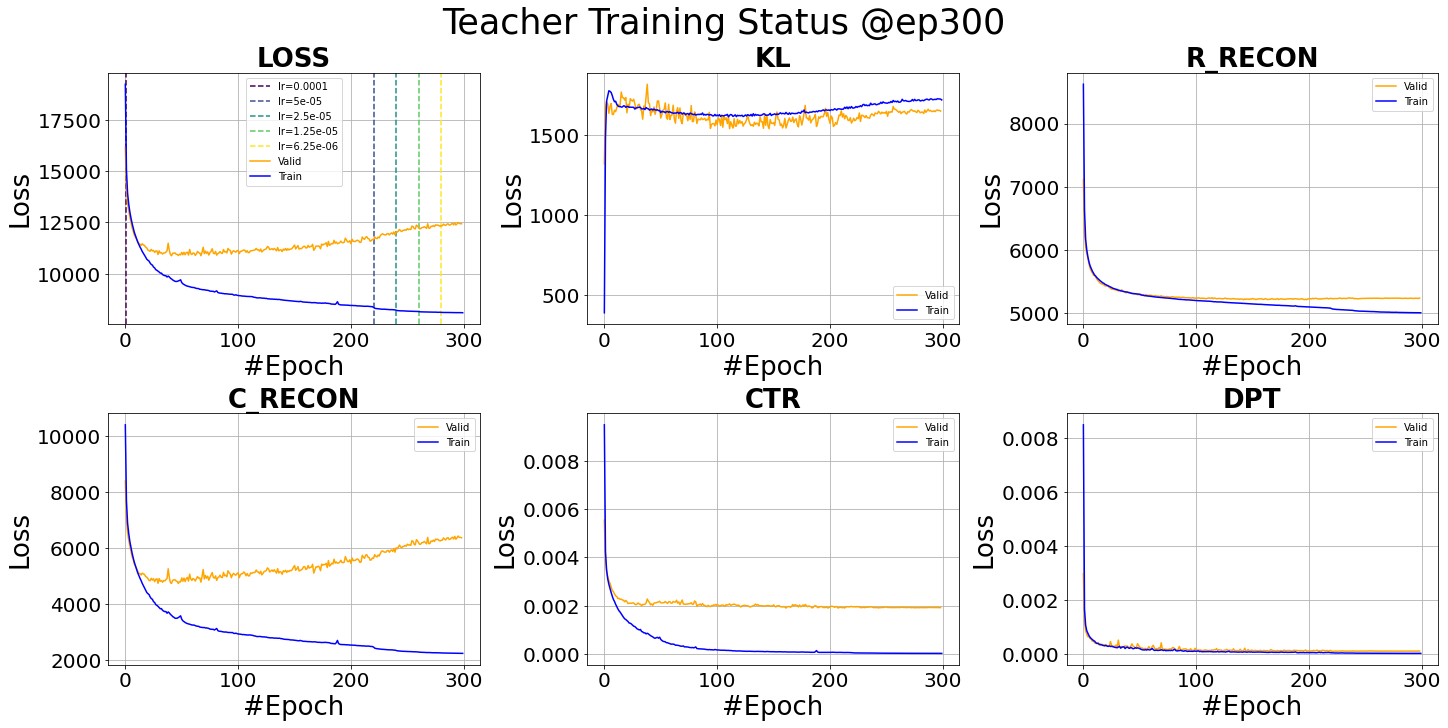

==========20240909_Env_A208 Teacher Test starting==========



  0%|          |[00:00<?]

/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Test finished. Average loss={'LOSS': 7253.115972381929, 'KL': 26.839361850727986, 'R_RECON': 5002.819076959599, 'C_RECON': 2236.87721473736, 'CTR': 1.7108031446025904e-05, 'DPT': 1.91342174819899e-05}

Total training time: 99.47696328163147 sec


<Figure size 1440x720 with 0 Axes>

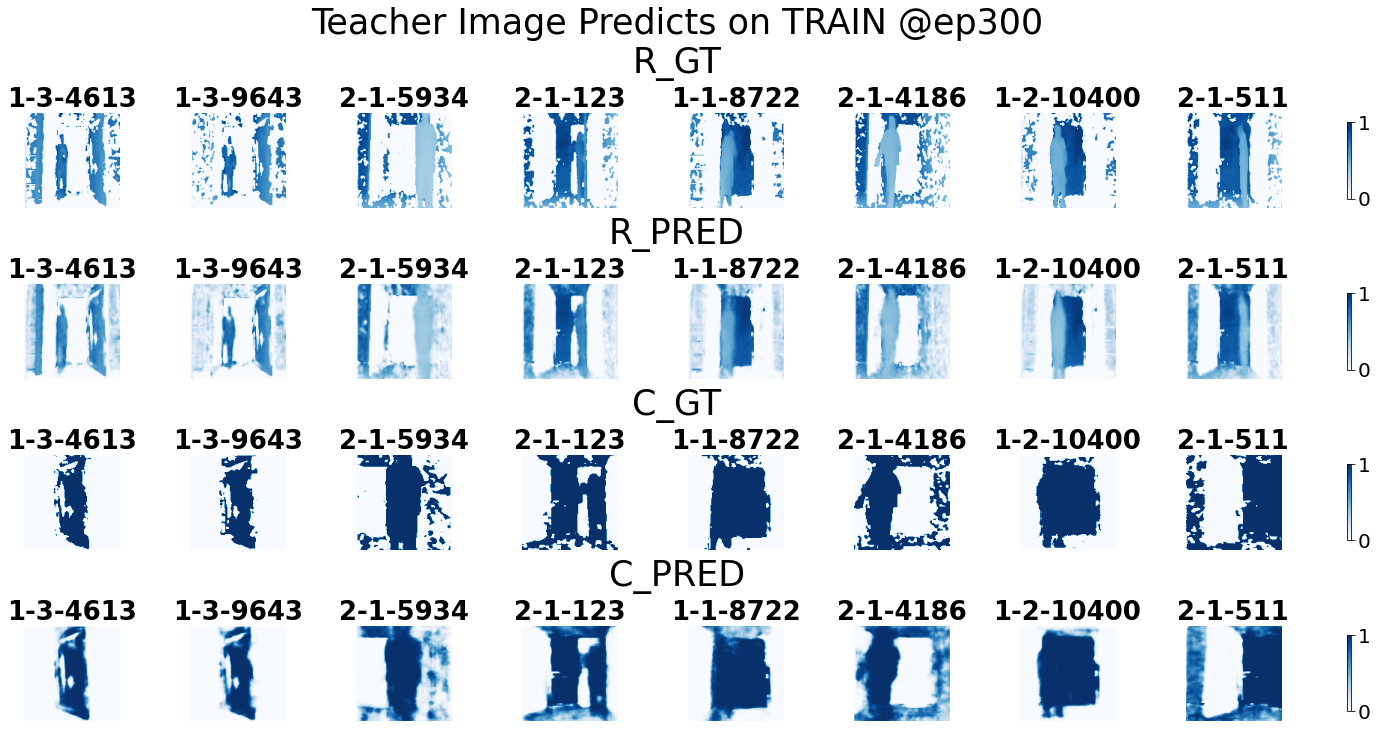

<Figure size 1440x720 with 0 Axes>

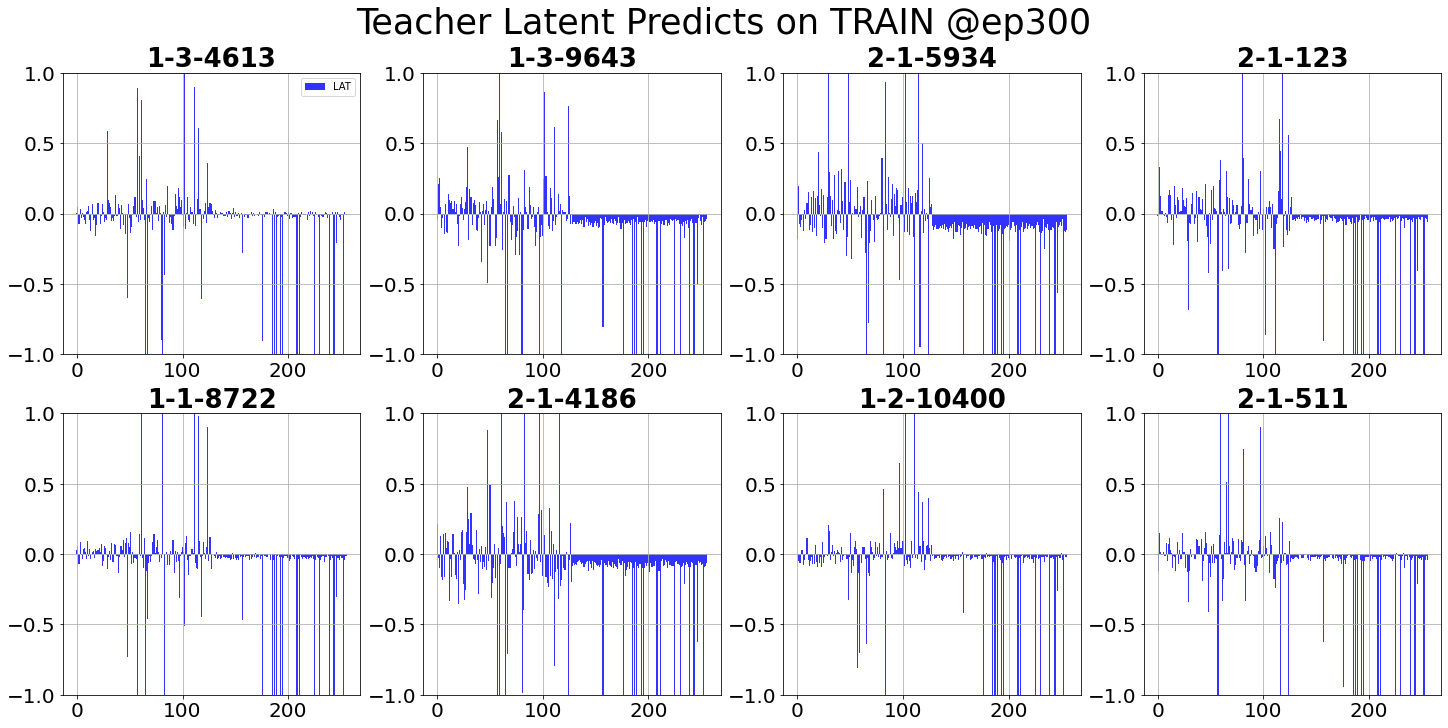

<Figure size 1440x720 with 0 Axes>

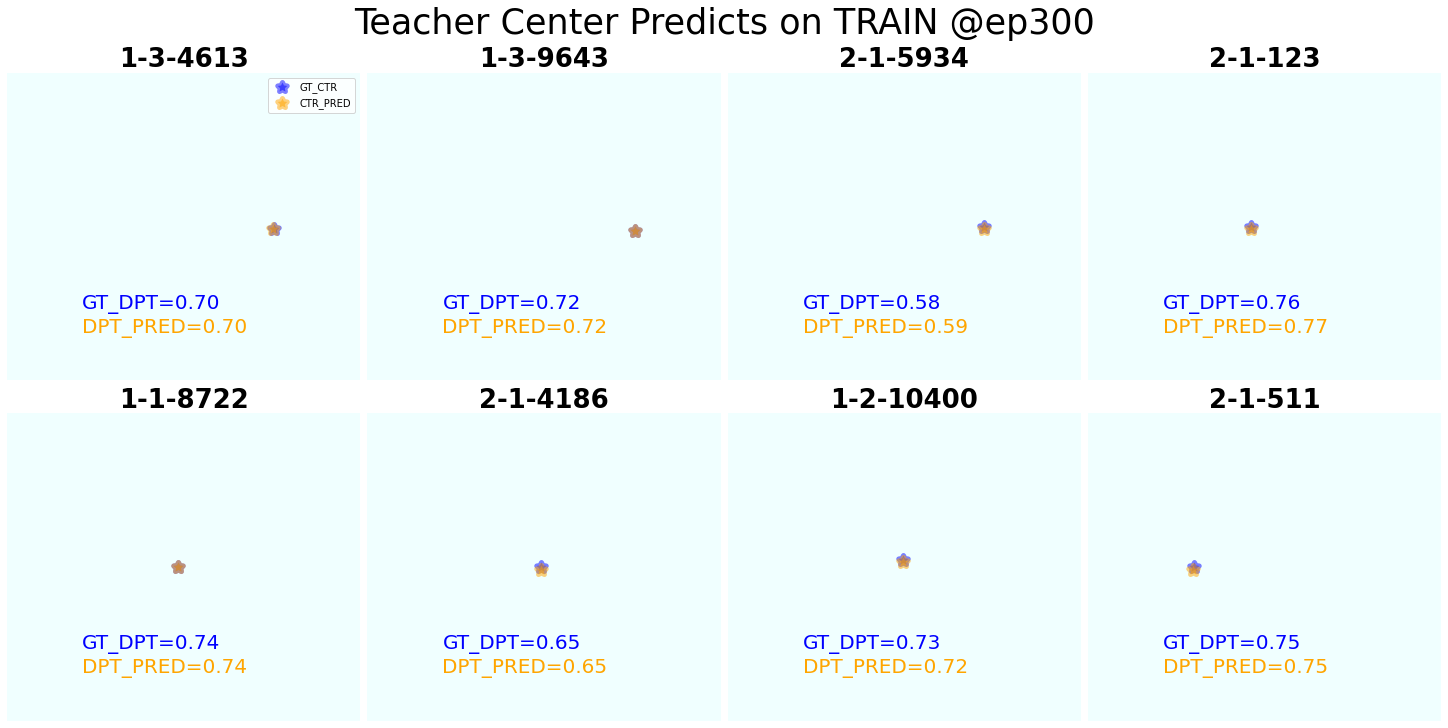

==========20240909_Env_A208 Teacher Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 20662.269377304136, 'KL': 26.719522636896496, 'R_RECON': 8437.890829727789, 'C_RECON': 12211.01531106581, 'CTR': 0.002524910924470957, 'DPT': 0.0011594743641734865}

Total training time: 84.03630304336548 sec


<Figure size 1440x720 with 0 Axes>

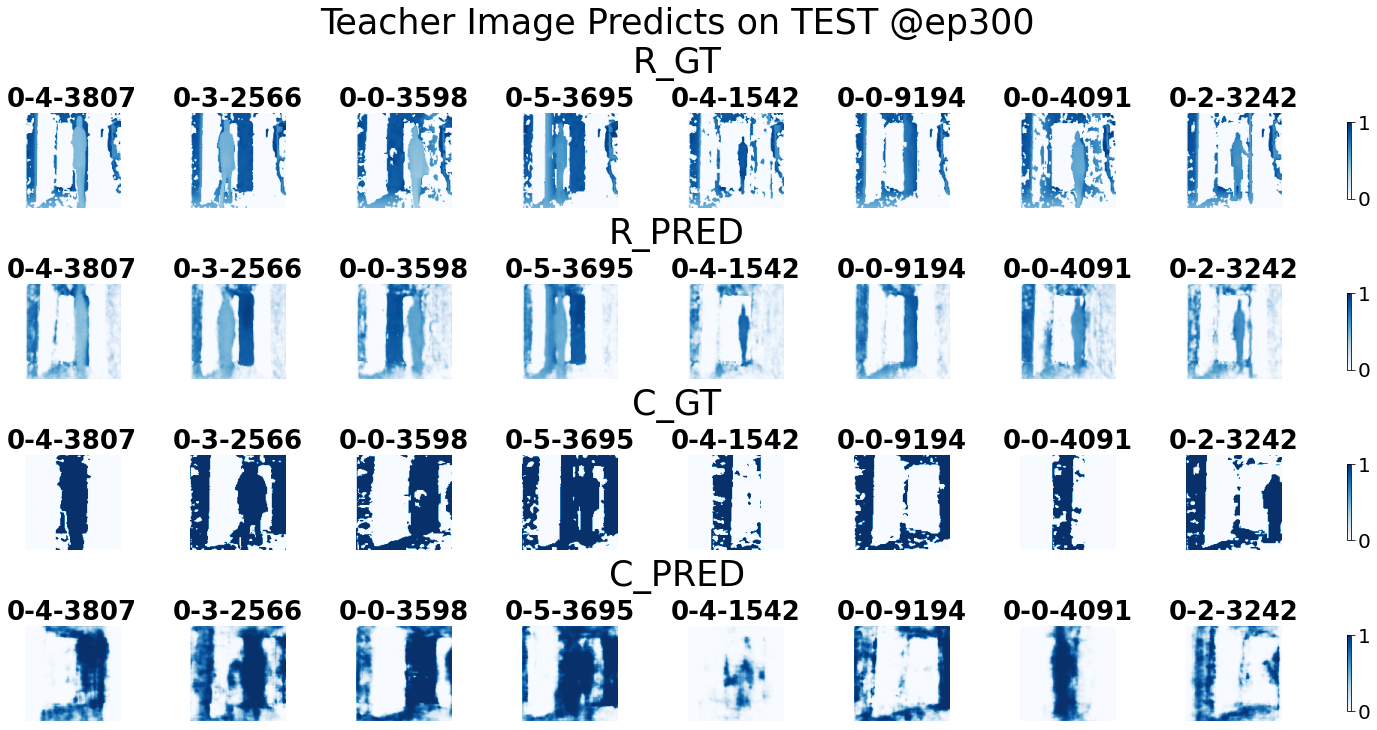

<Figure size 1440x720 with 0 Axes>

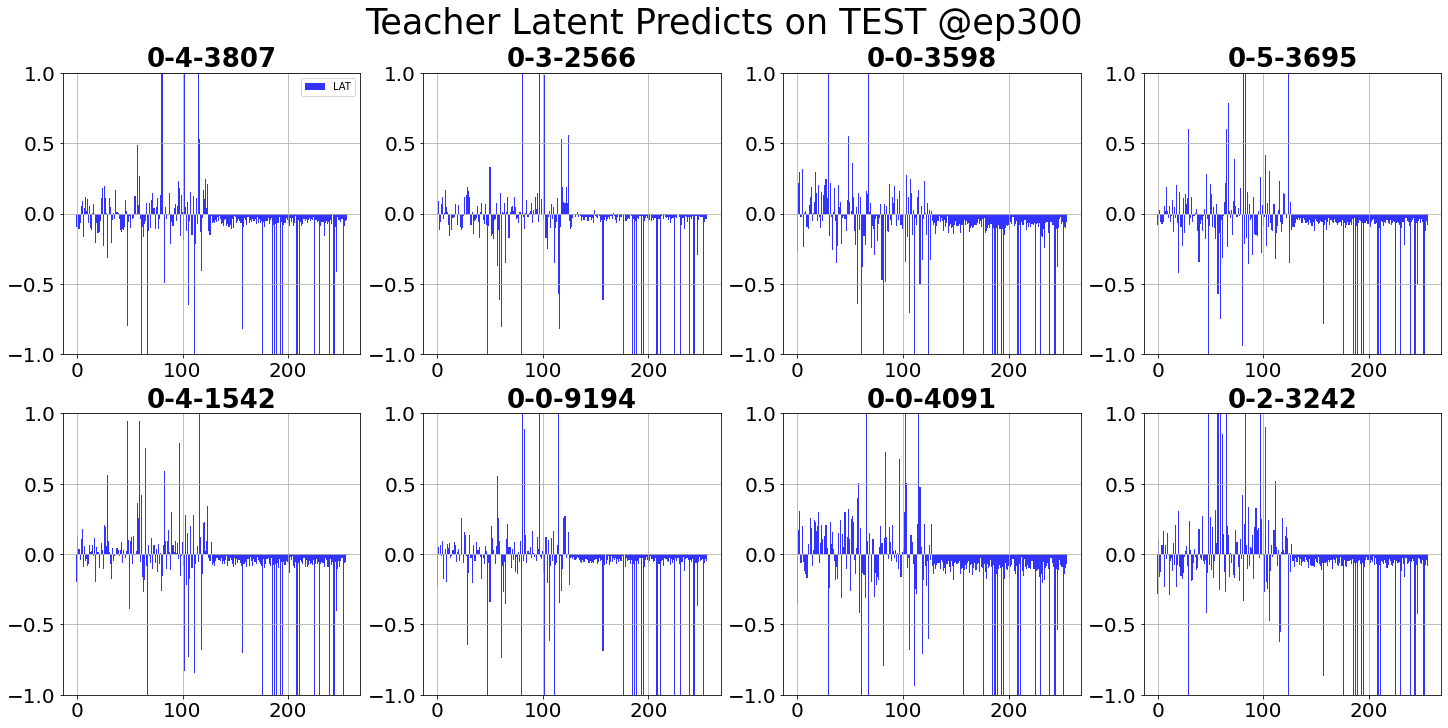

<Figure size 1440x720 with 0 Axes>

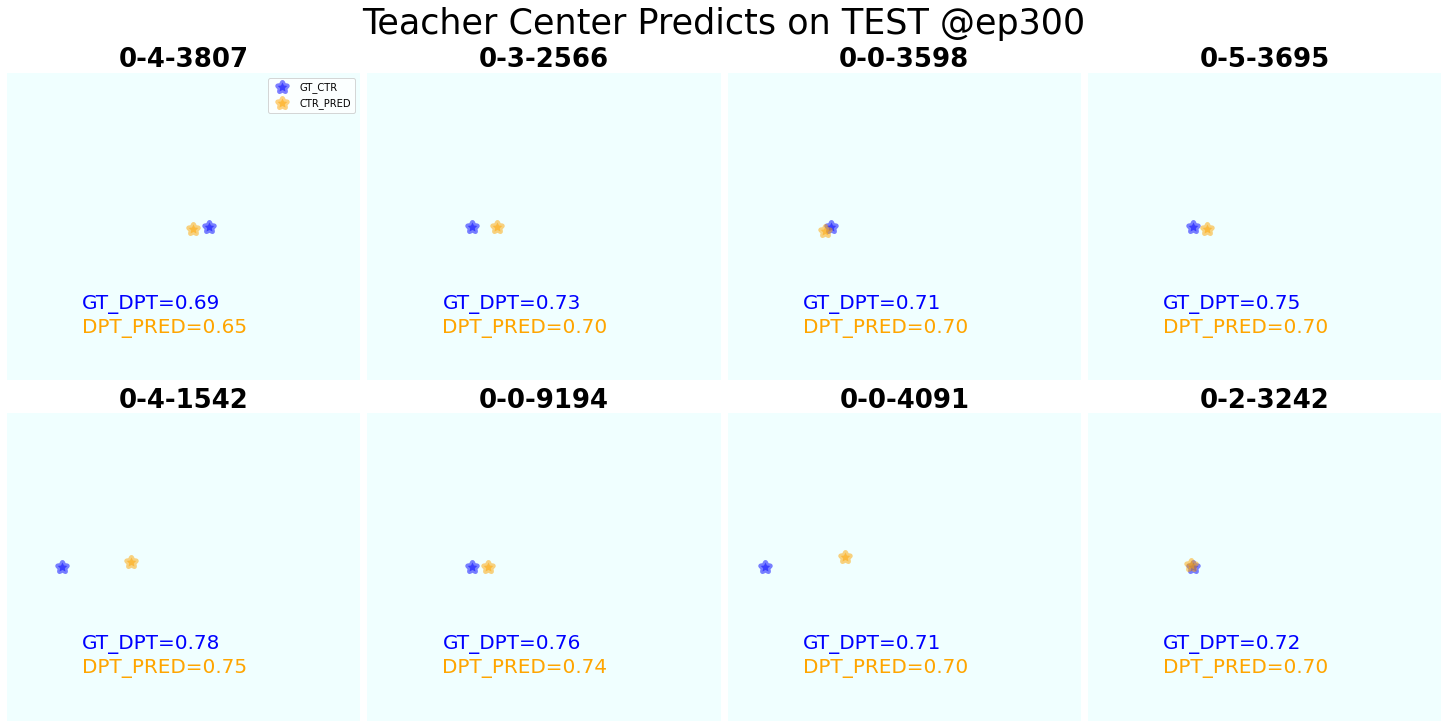

Saving preds: R_PRED...
Saving preds: C_PRED...
Saving preds: DPT_PRED...
Saving preds: CTR_PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

Teacher schedule Completed!


In [4]:
# data_organizer.batch_size = 1
preprocess = DS.Preprocess(new_size=(128, 128))

torch.cuda.set_device(gpu)
data_organizer.gen_plan(subset_ratio=0.1)

train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='t')

T_trainer = TP.TeacherTrainer(beta=0.5,
                          name='Teacher',
                          loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                          lr=1e-4, epochs=10, cuda=gpu,
                              preprocess = preprocess,
                          train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                          notion=f'{name}_{current_test}')
T_trained = T_trainer.schedule(lr_decay=True)



### Student

In [5]:
# data_organizer.batch_size = 1
preprocess = DS.Preprocess(new_size=(128, 128))

torch.cuda.set_device(gpu)
#data_organizer.gen_plan(subset_ratio=0.1, save=True)
data_organizer.load_plan('../dataset/Door_EXP/env_r0.1.pkl')

Loaded plan!


Generating loaders for s: level = env, current test = C605
 Train dataset length = 15749
 Test dataset length = 4559
 Exported train loader of len 196, batch size = 64
 Exported valid loader of len 49, batch size = 64
 Exported test loader of len 4559, batch size = 1

==========20240915_Env_C605 Student Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 300...

Total training time: 64019.766807317734 sec


<Figure size 432x288 with 0 Axes>

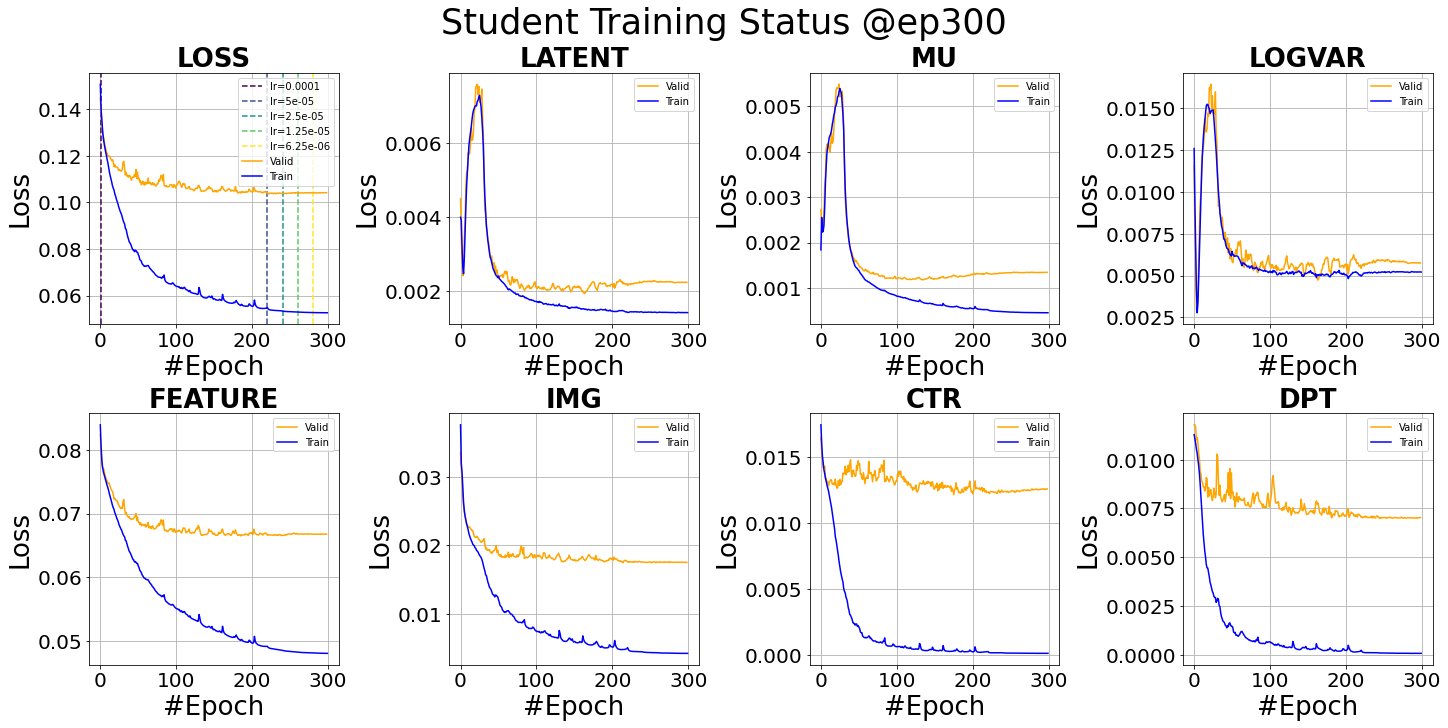

==========20240915_Env_C605 Student Test starting==========



  0%|          |[00:00<?]

/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Test finished. Average loss={'LOSS': 0.06114708637472418, 'LATENT': 0.09022930742228673, 'MU': 0.028639081648384027, 'LOGVAR': 0.33659020263410044, 'FEATURE': 0.04789213712026641, 'IMG': 0.004097331240267155, 'CTR': 9.010378818381623e-05, 'DPT': 4.4583332795960186e-05}

Total training time: 223.53845596313477 sec


<Figure size 1440x720 with 0 Axes>

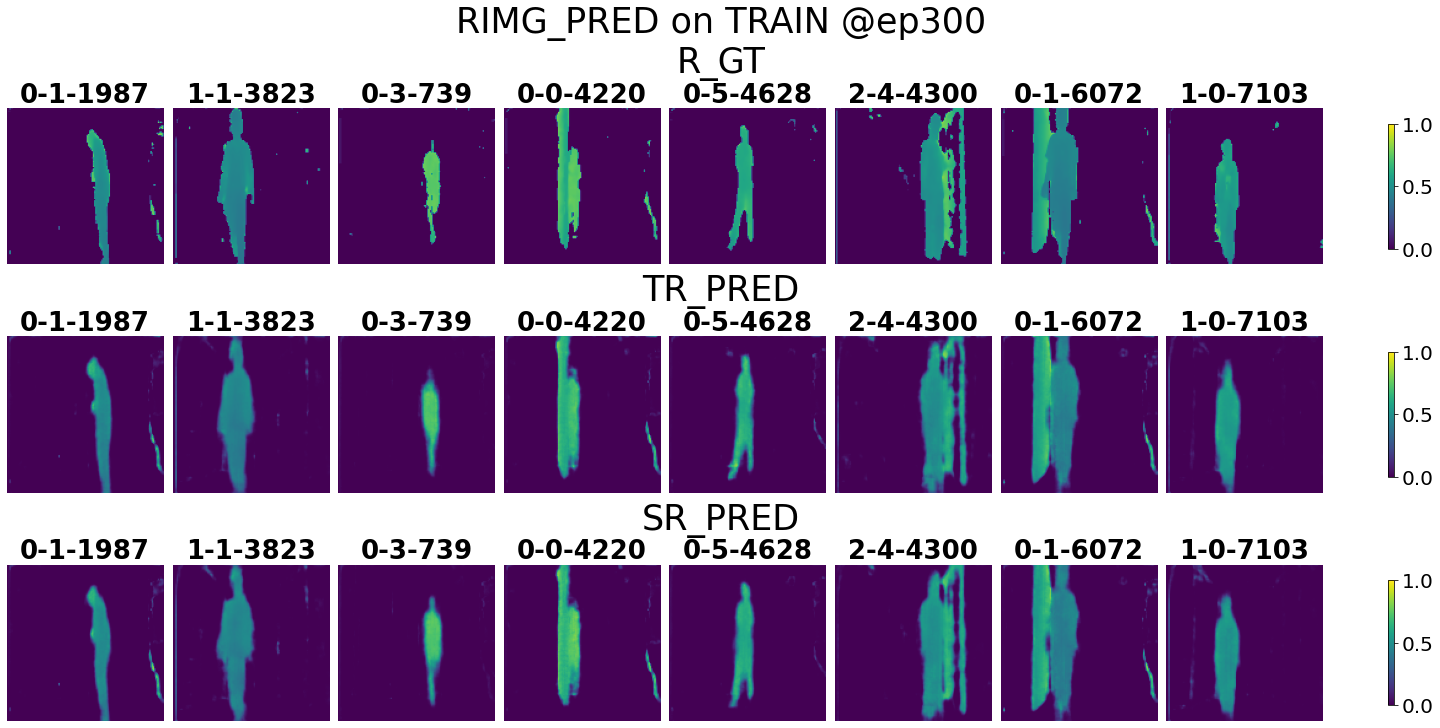

<Figure size 1440x720 with 0 Axes>

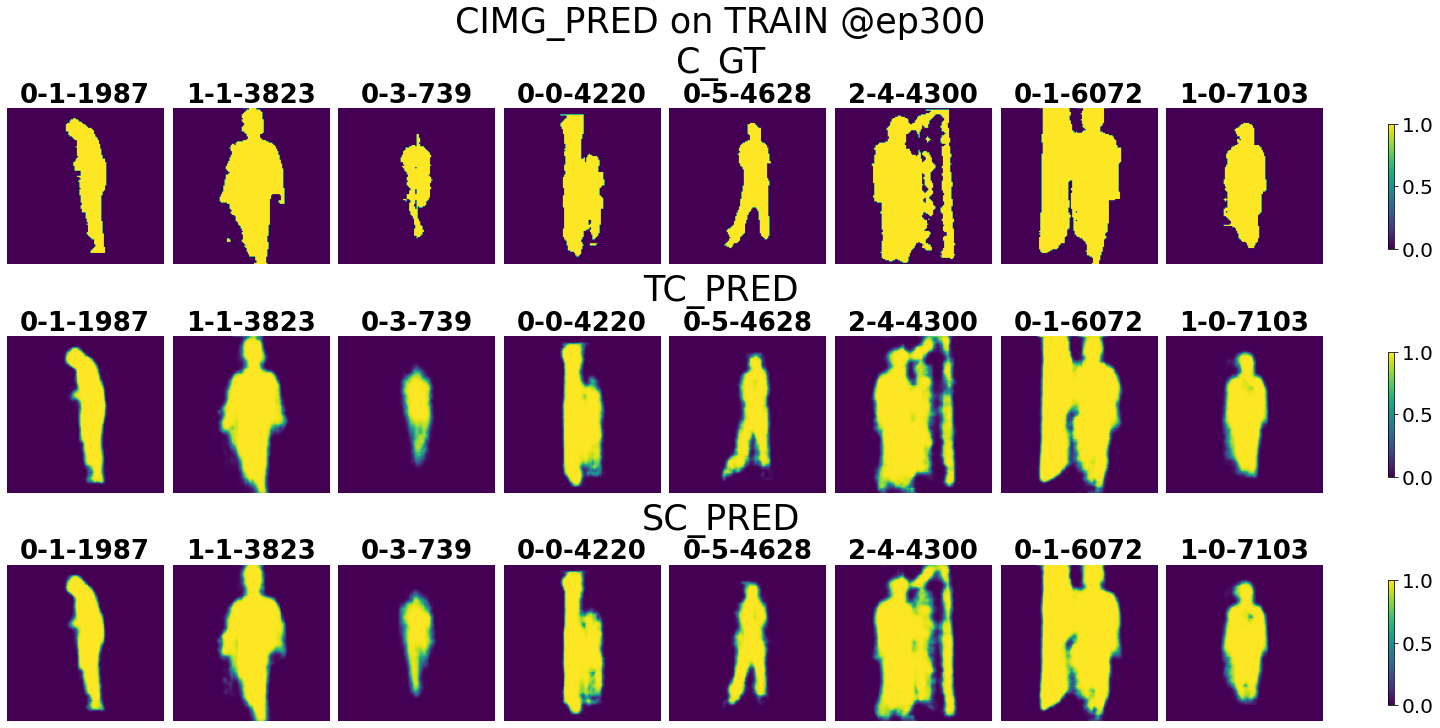

<Figure size 1440x720 with 0 Axes>

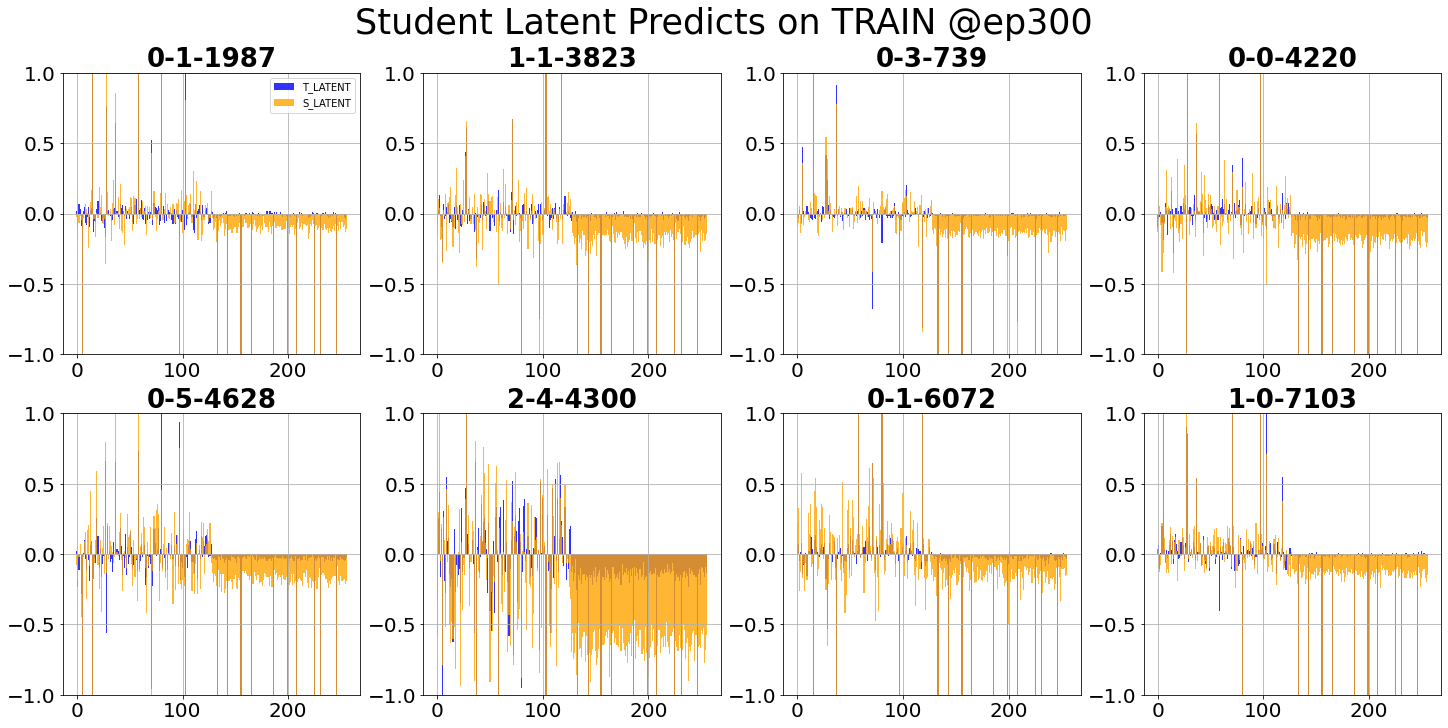

<Figure size 1440x720 with 0 Axes>

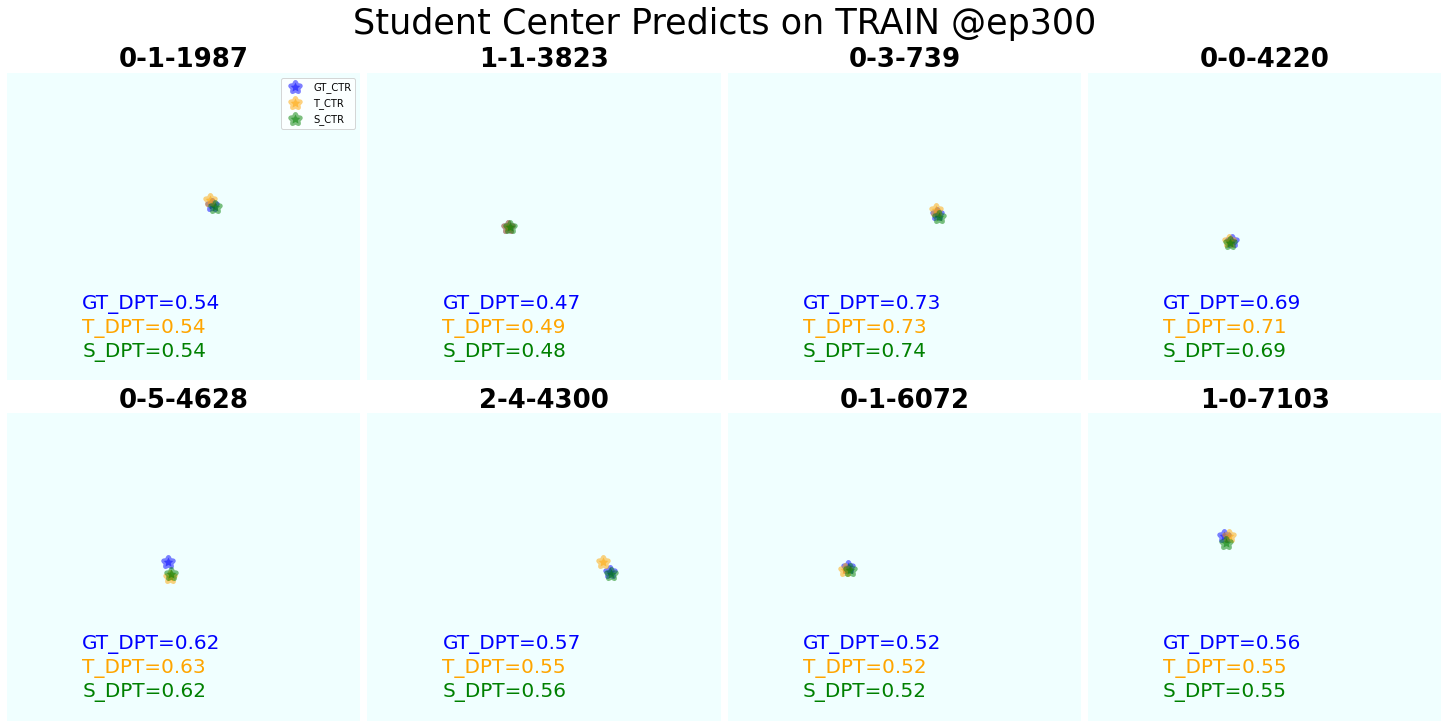

<Figure size 1440x720 with 0 Axes>

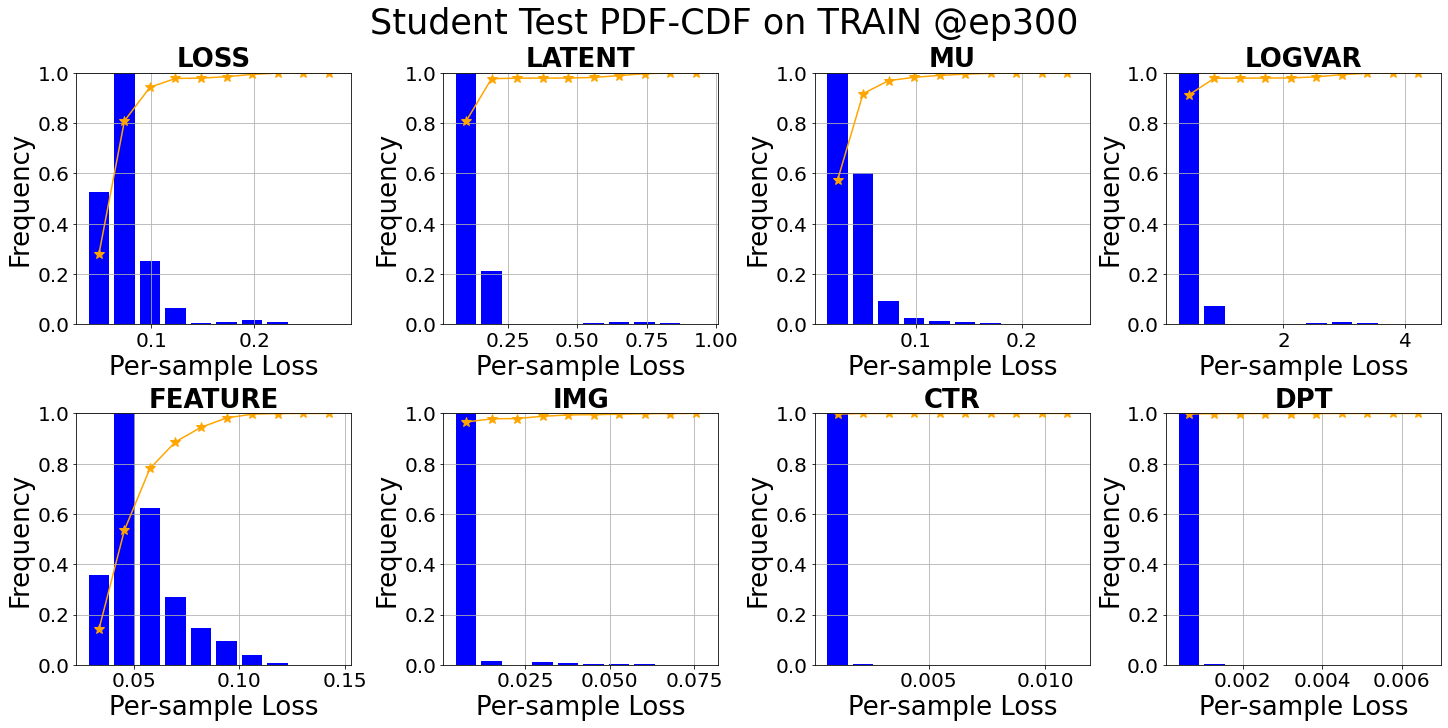

==========20240915_Env_C605 Student Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 0.20913710298327584, 'LATENT': 0.2203905113371521, 'MU': 0.147684703493347, 'LOGVAR': 0.5112137231088392, 'FEATURE': 0.09790120963648657, 'IMG': 0.03776178522912971, 'CTR': 0.03340353130473202, 'DPT': 0.018031525200309293}

Total training time: 122.65421104431152 sec


<Figure size 1440x720 with 0 Axes>

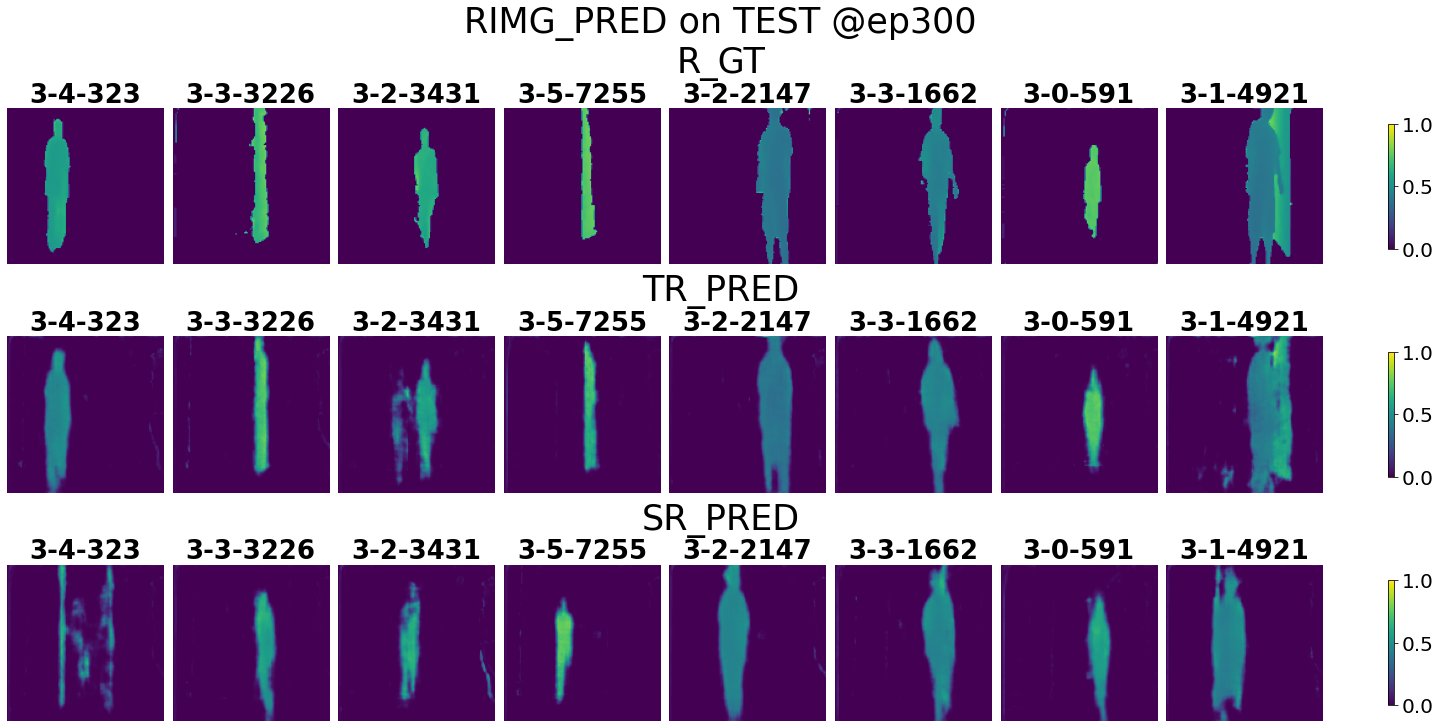

<Figure size 1440x720 with 0 Axes>

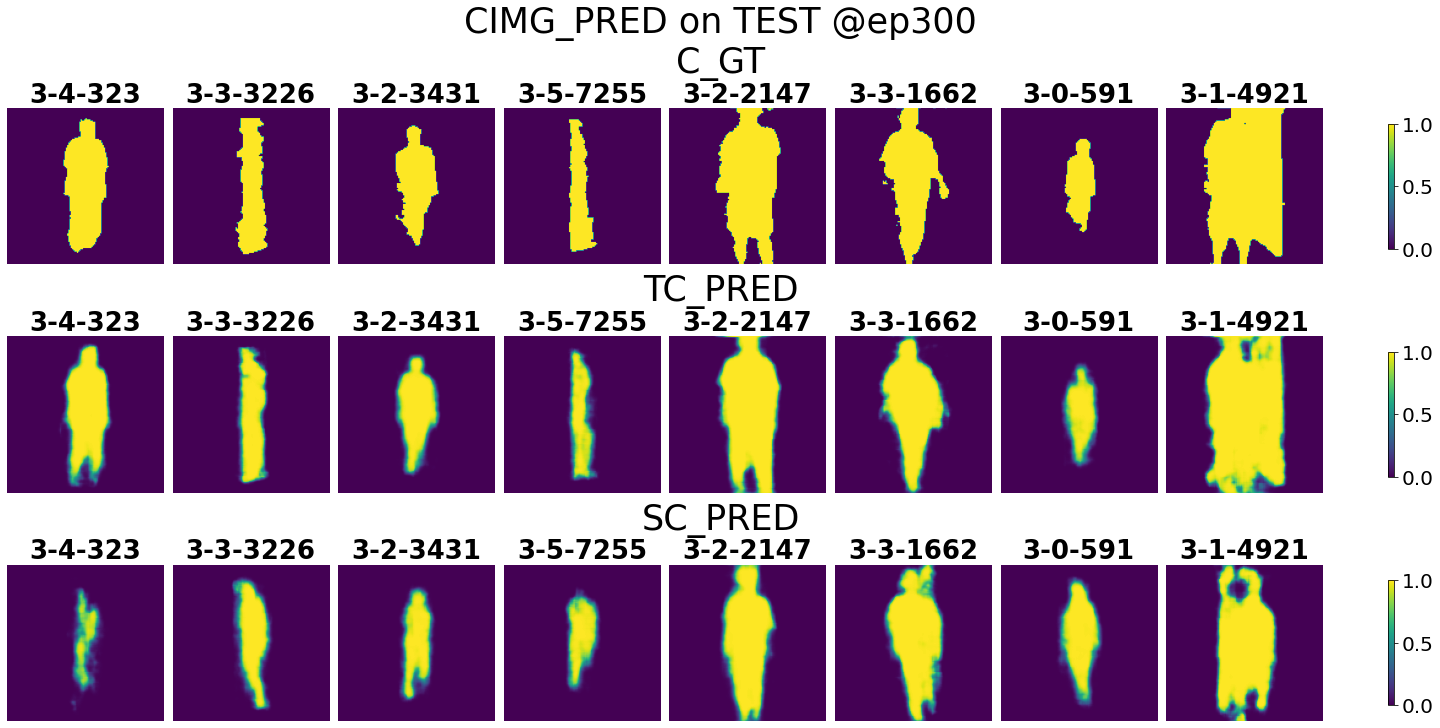

<Figure size 1440x720 with 0 Axes>

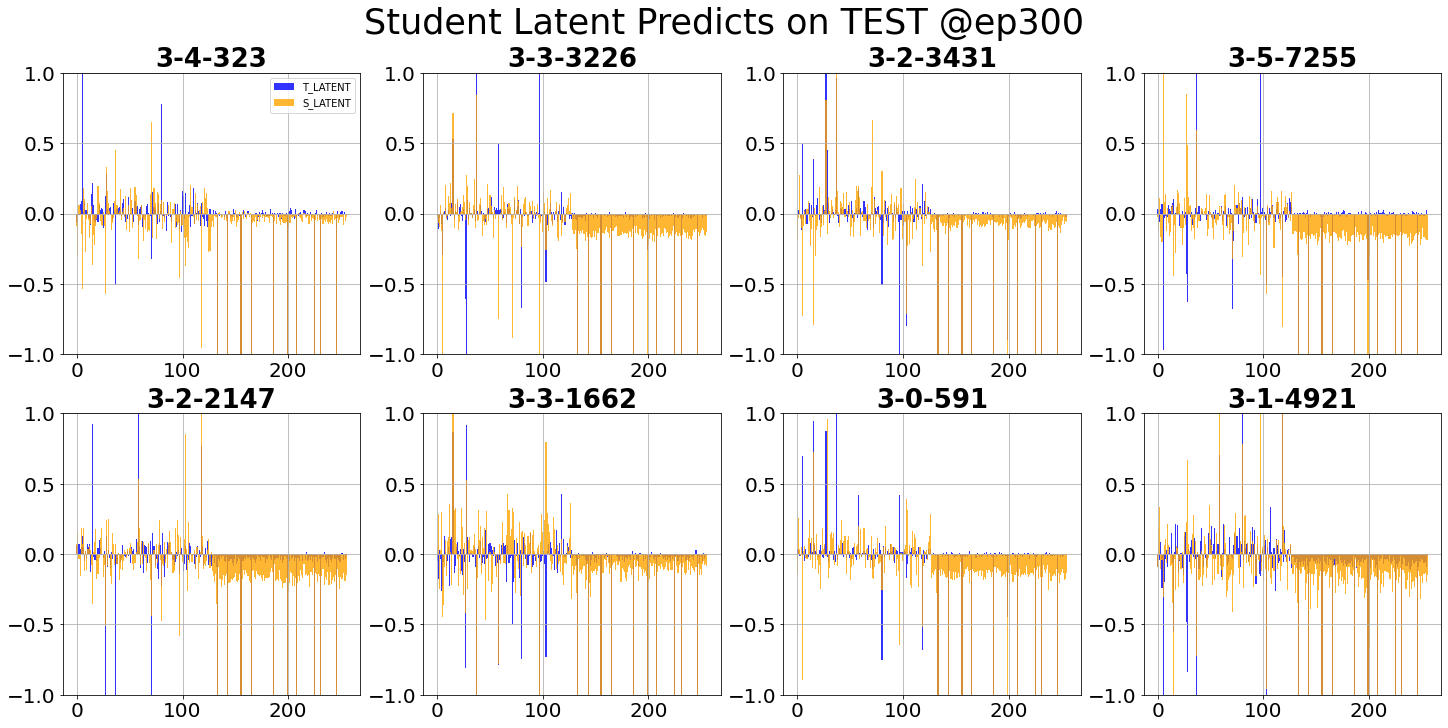

<Figure size 1440x720 with 0 Axes>

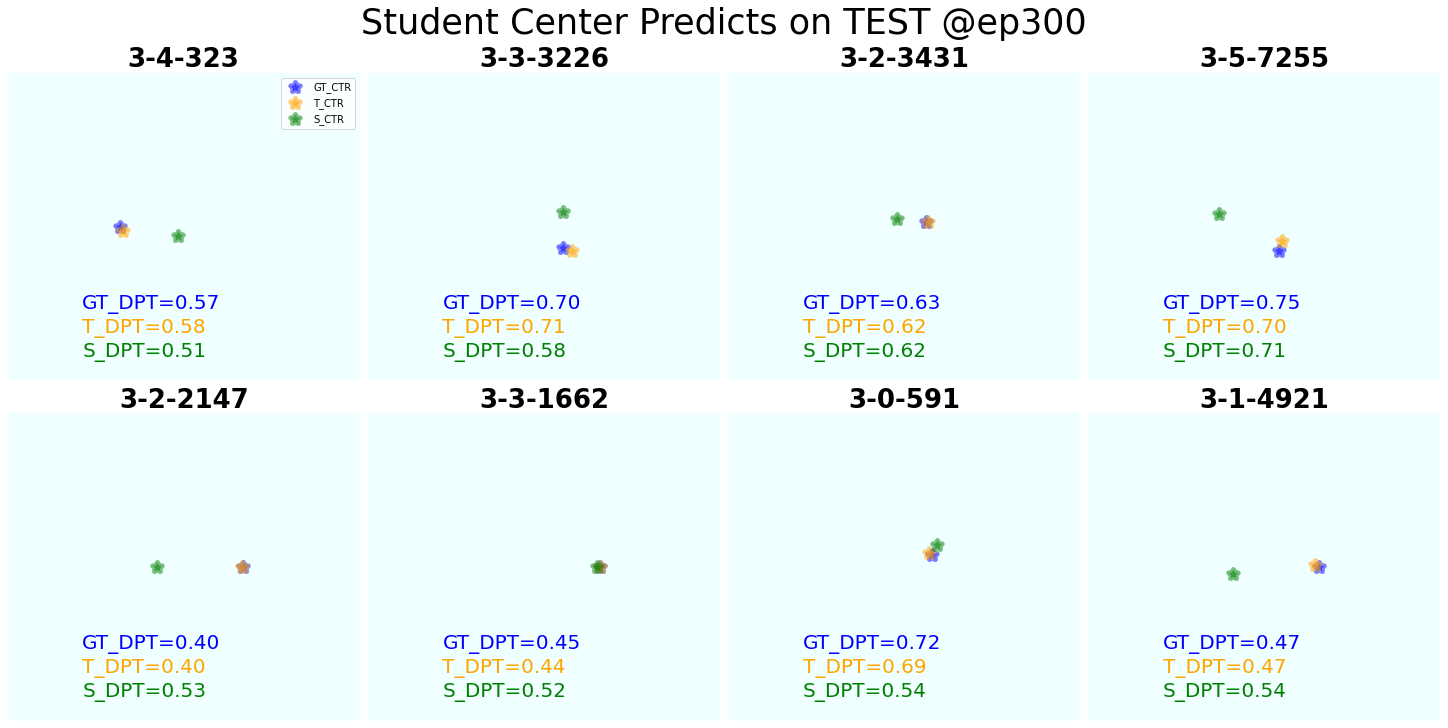

<Figure size 1440x720 with 0 Axes>

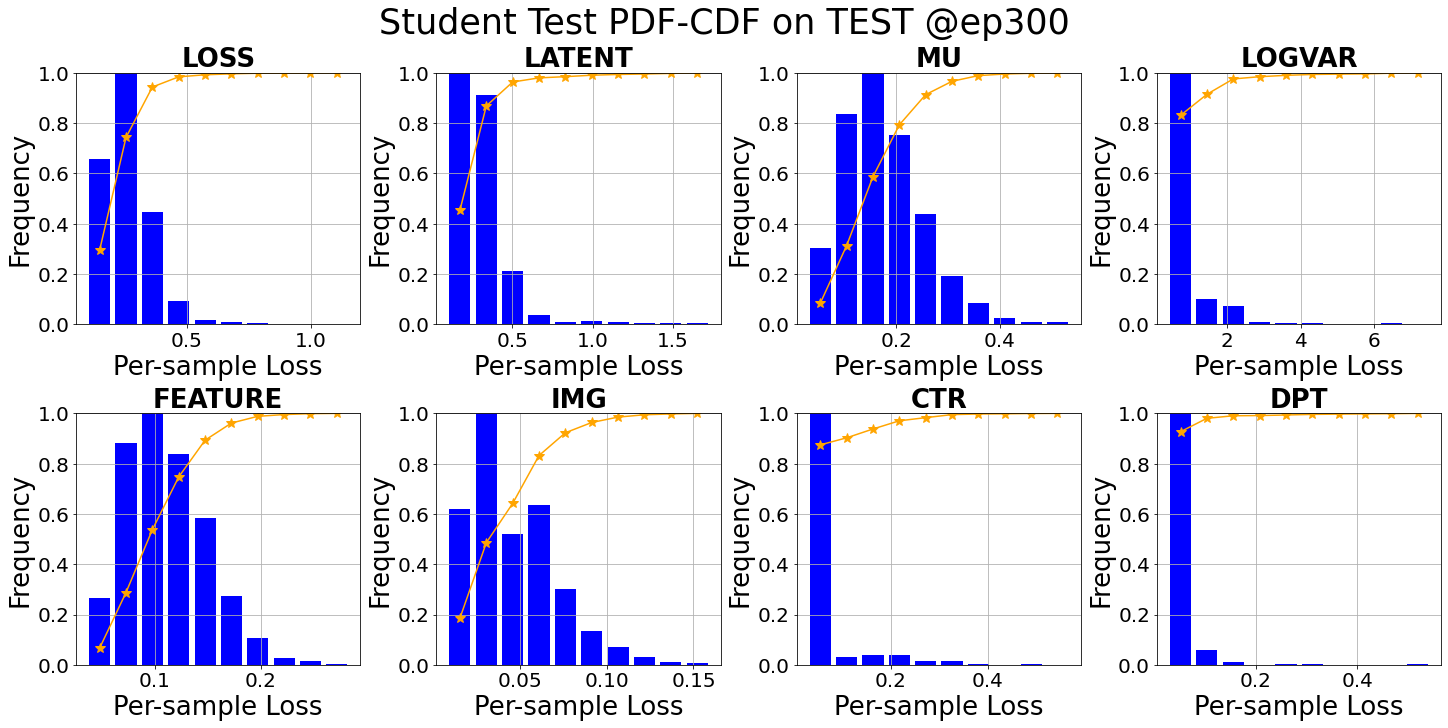

Saving preds: TR_PRED...
Saving preds: SR_PRED...
Saving preds: TC_PRED...
Saving preds: SC_PRED...
Saving preds: T_LATENT...
Saving preds: S_LATENT...
Saving preds: T_CTR...
Saving preds: T_DPT...
Saving preds: S_CTR...
Saving preds: S_DPT...
Saving preds: TAG...
All saved!

Student schedule Completed!
Generating loaders for s: level = env, current test = A208
 Train dataset length = 14544
 Test dataset length = 5766
 Exported train loader of len 181, batch size = 64
 Exported valid loader of len 45, batch size = 64
 Exported test loader of len 5766, batch size = 1

==========20240915_Env_A208 Student Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:03<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 308...

Total training time: 73784.56929159164 sec


<Figure size 1440x720 with 0 Axes>

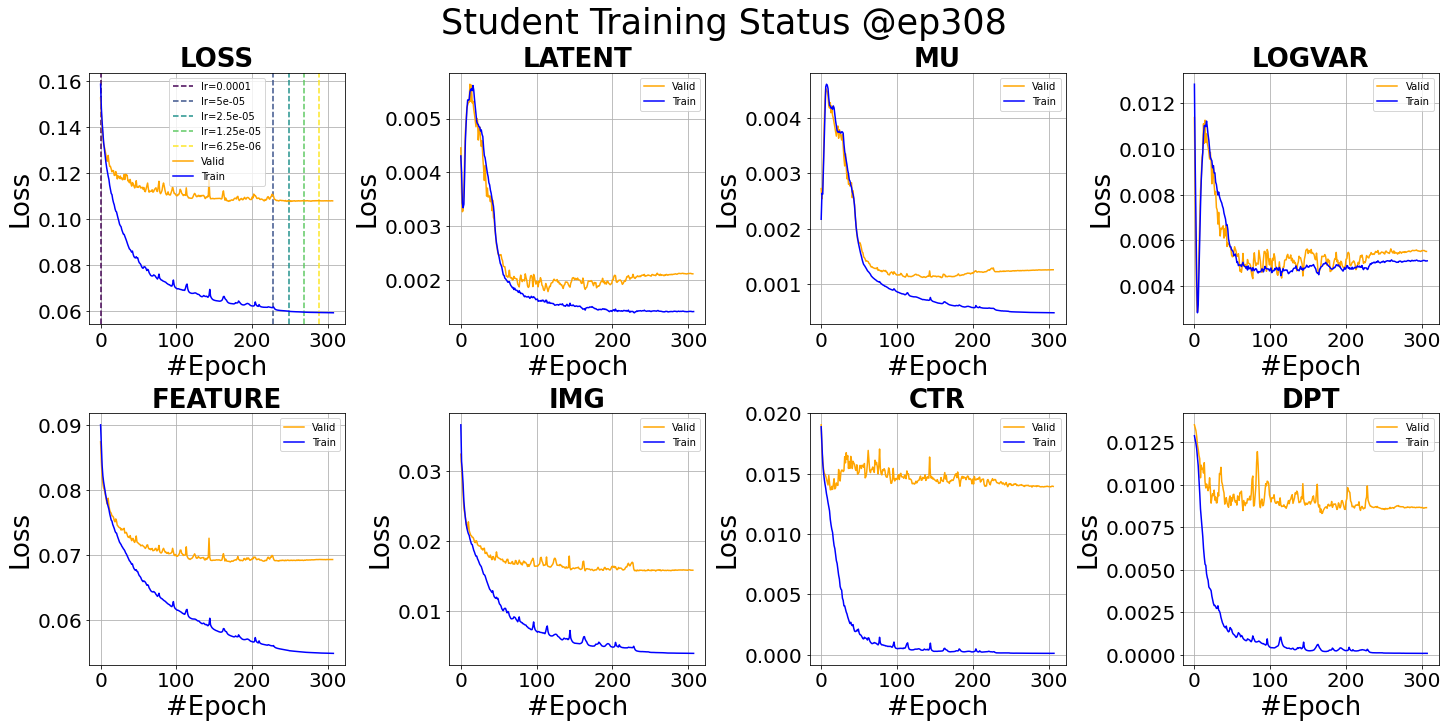

==========20240915_Env_A208 Student Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 0.06779830756612336, 'LATENT': 0.09040227290189848, 'MU': 0.030778709049768347, 'LOGVAR': 0.3288965200623774, 'FEATURE': 0.054740741271210466, 'IMG': 0.0038977140102324746, 'CTR': 7.720117792184166e-05, 'DPT': 4.242375733408172e-05}

Total training time: 344.5225045681 sec


<Figure size 1440x720 with 0 Axes>

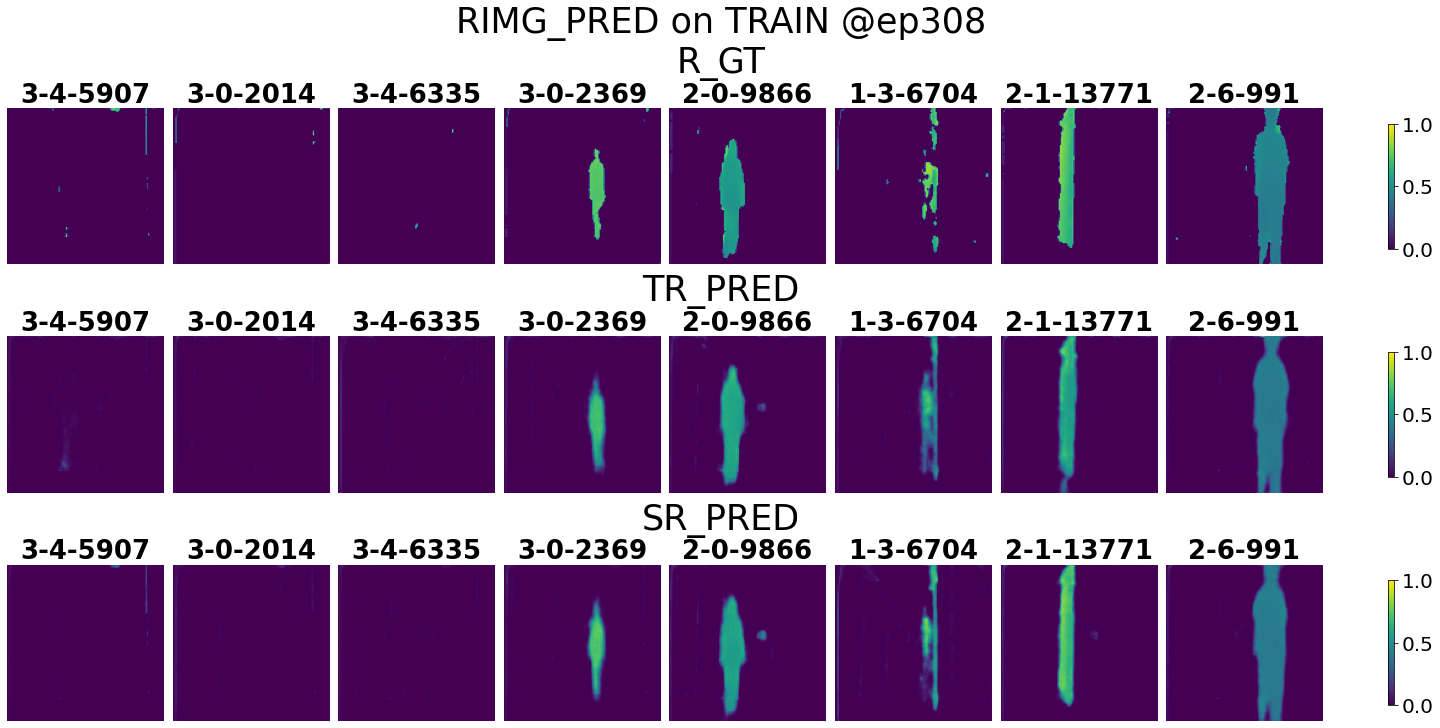

<Figure size 1440x720 with 0 Axes>

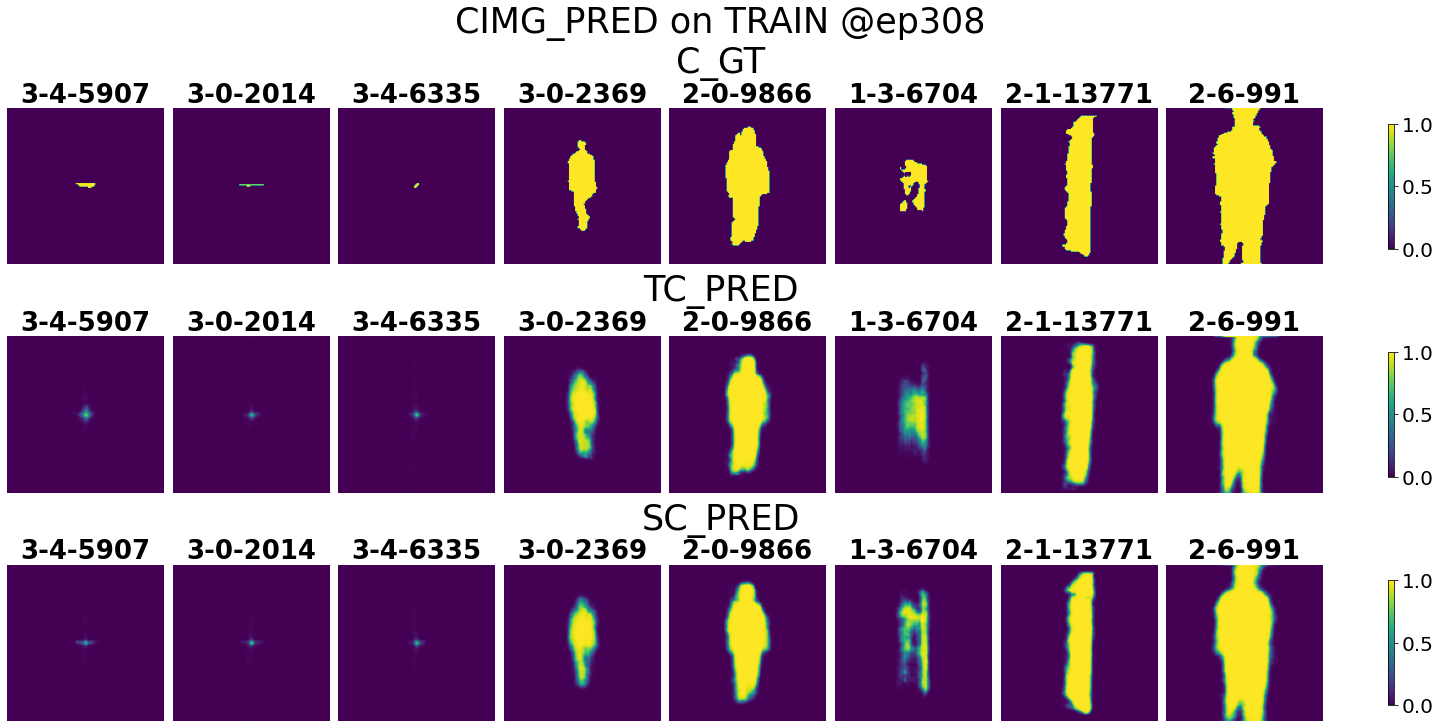

<Figure size 1440x720 with 0 Axes>

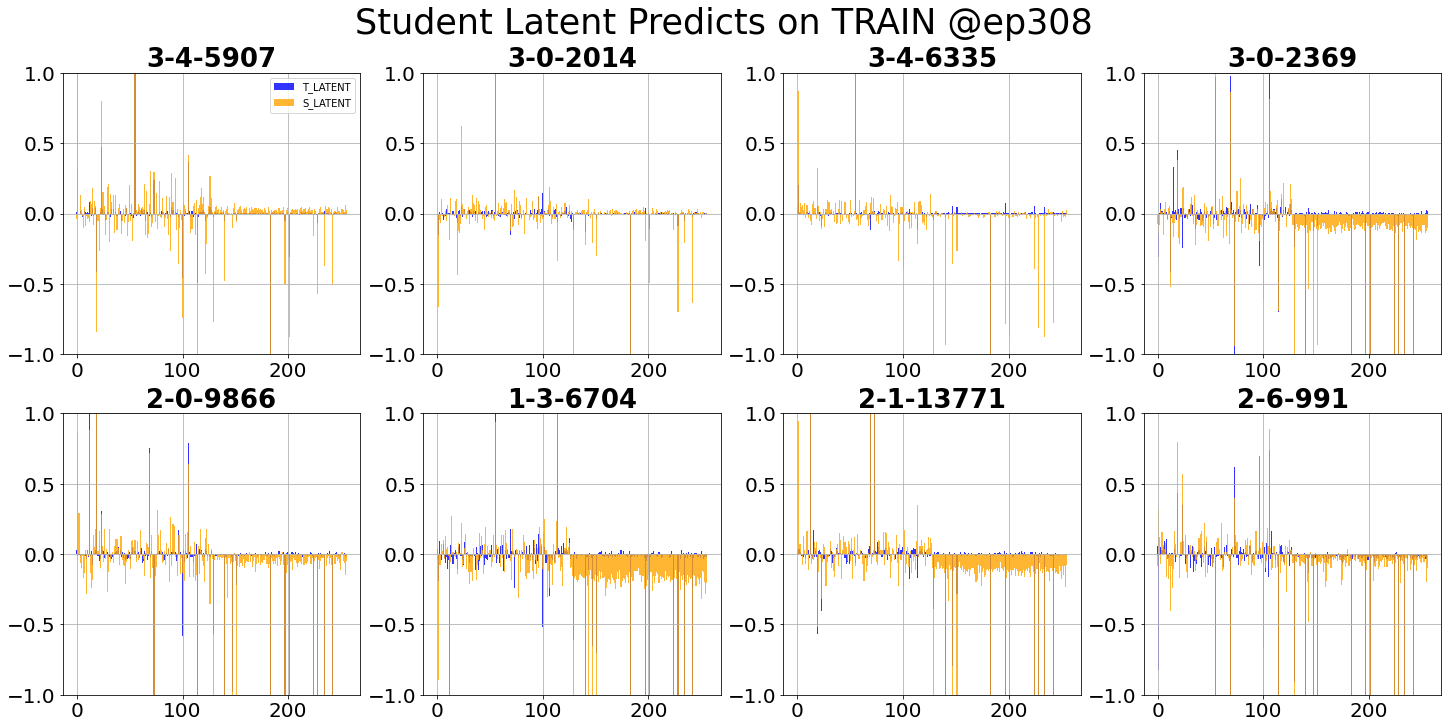

<Figure size 1440x720 with 0 Axes>

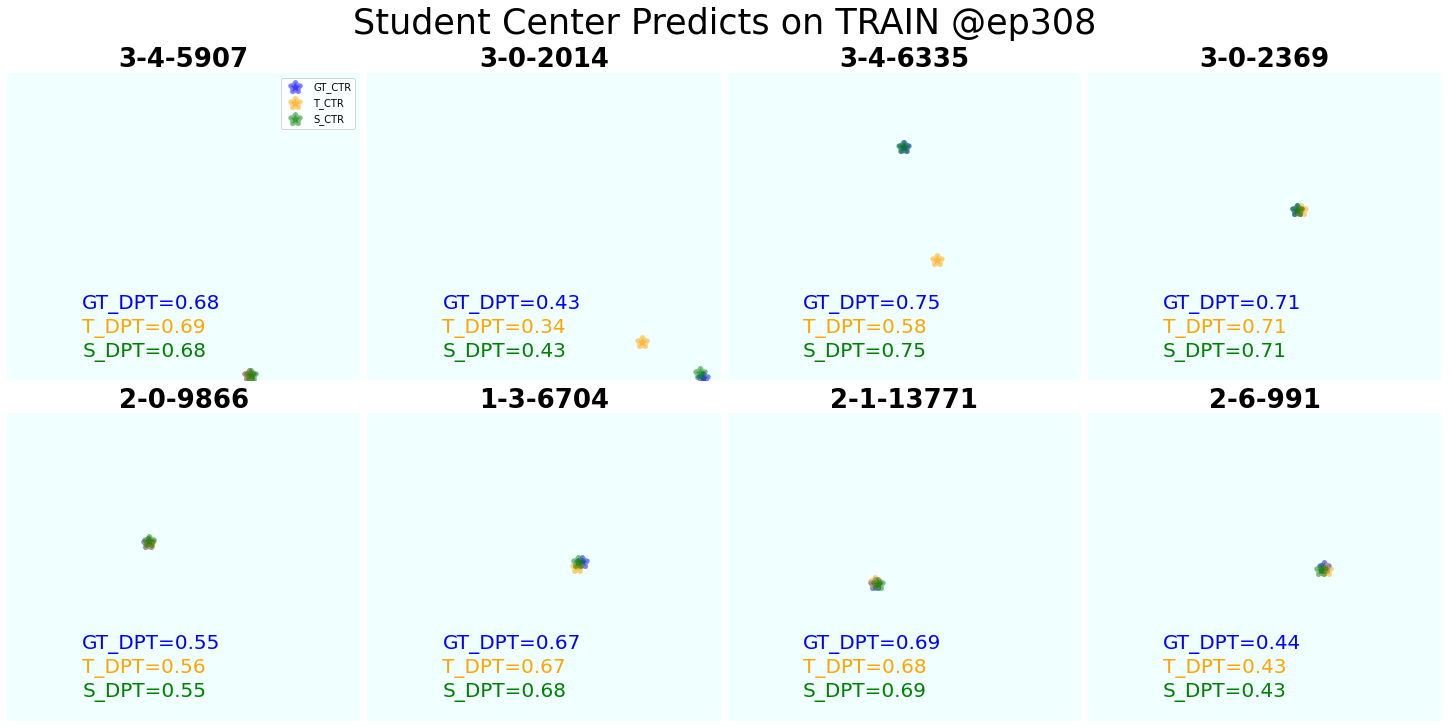

<Figure size 1440x720 with 0 Axes>

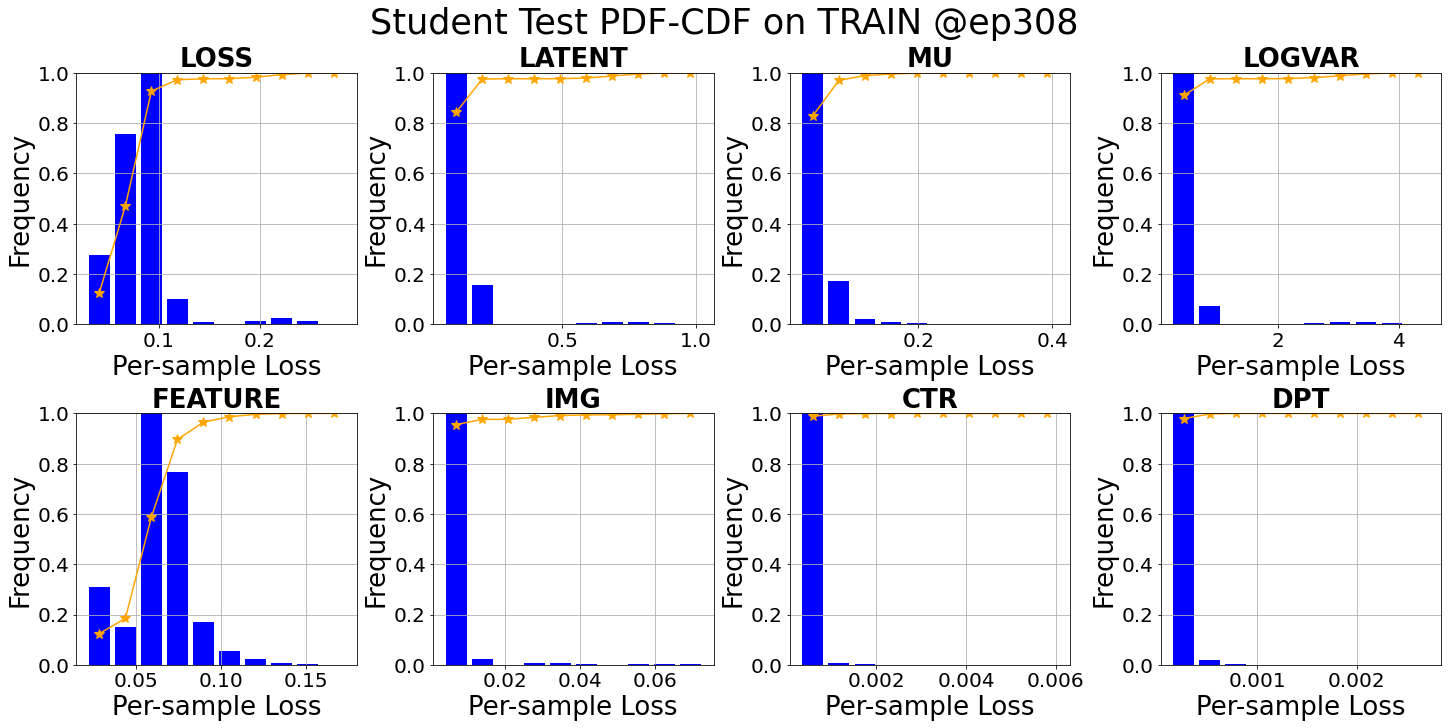

==========20240915_Env_A208 Student Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 0.20610722827076125, 'LATENT': 0.2265561150465751, 'MU': 0.15722231420116875, 'LOGVAR': 0.5038912985627315, 'FEATURE': 0.10234307830357305, 'IMG': 0.03881195486880311, 'CTR': 0.021111274667639346, 'DPT': 0.021185308793827625}

Total training time: 242.78308987617493 sec


<Figure size 1440x720 with 0 Axes>

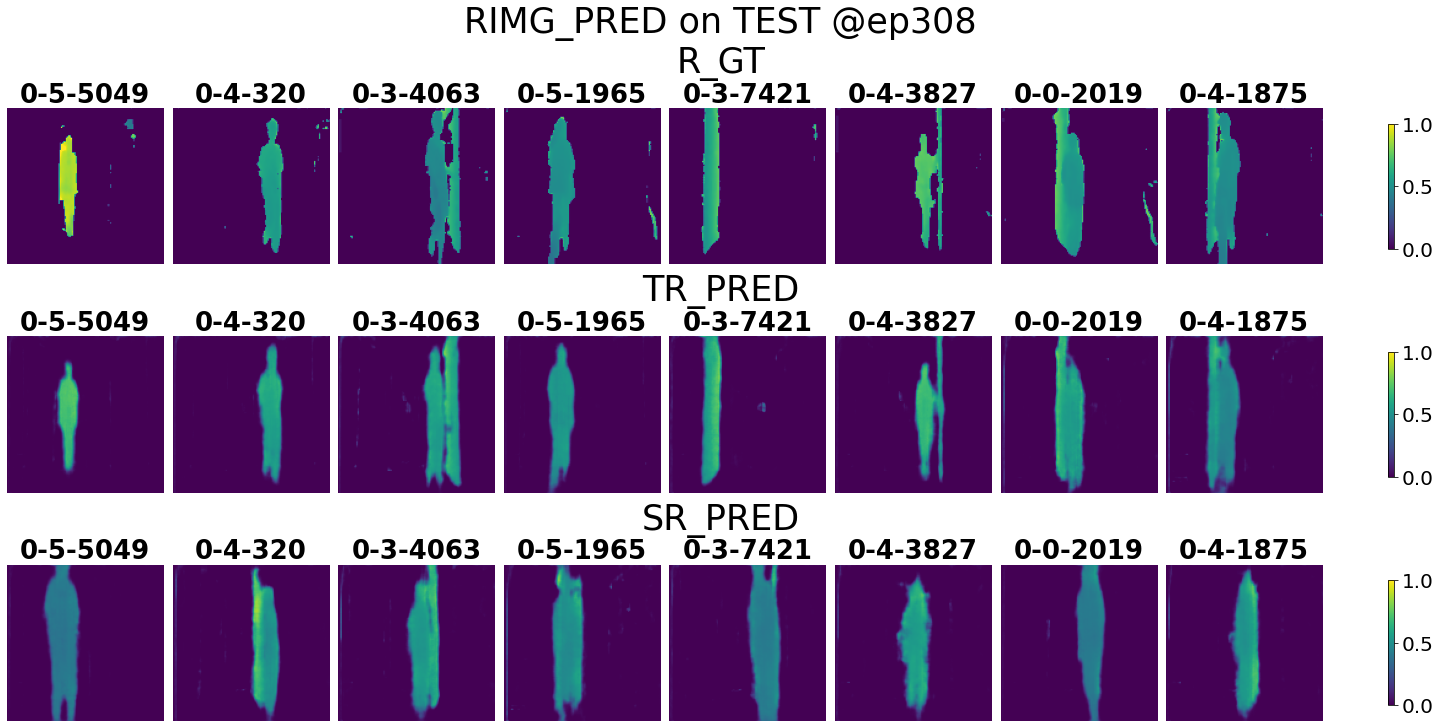

<Figure size 1440x720 with 0 Axes>

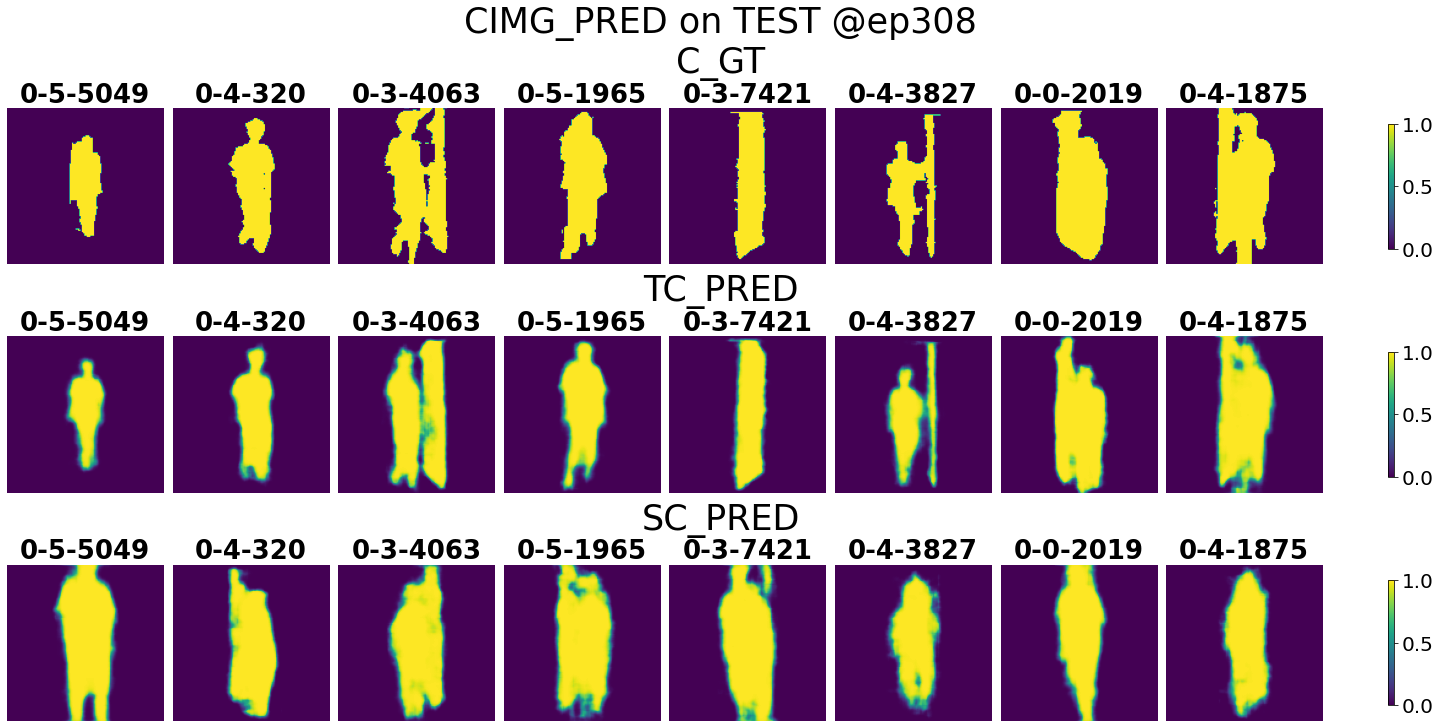

<Figure size 1440x720 with 0 Axes>

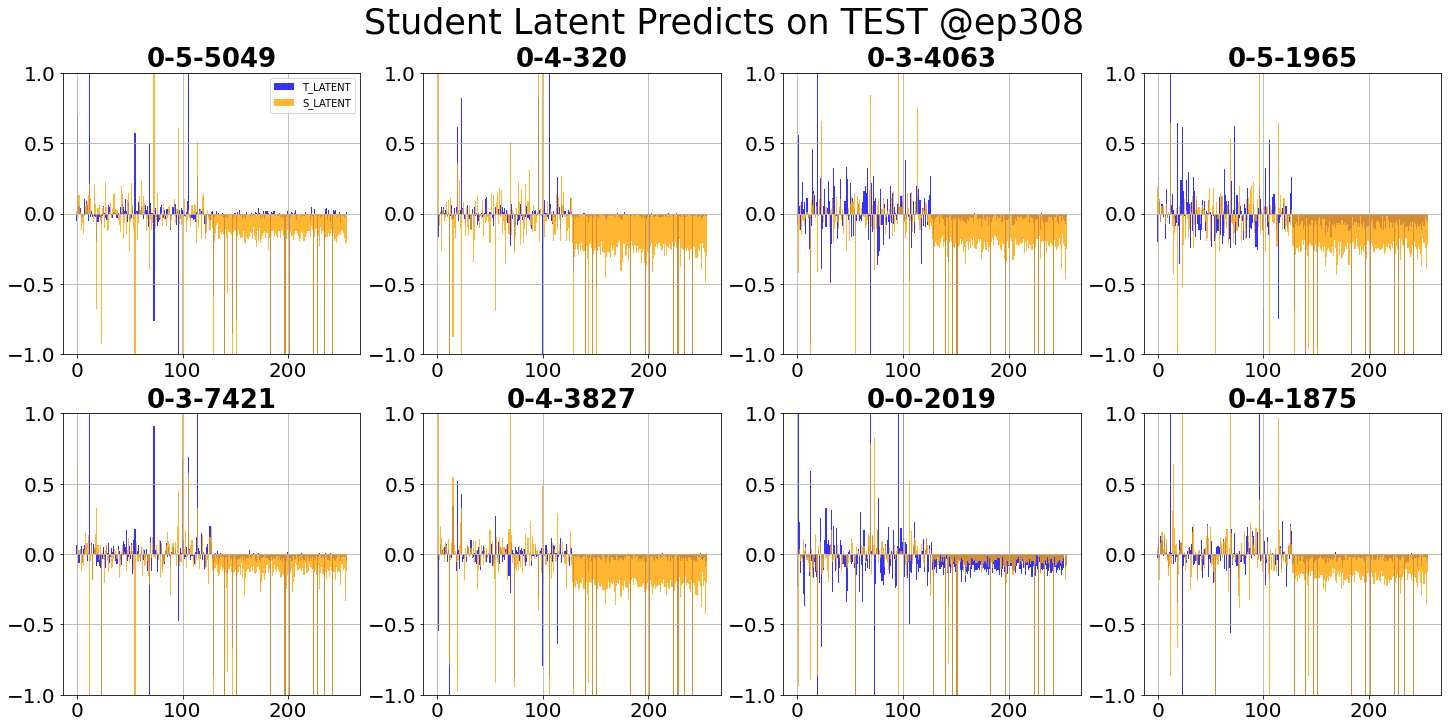

<Figure size 1440x720 with 0 Axes>

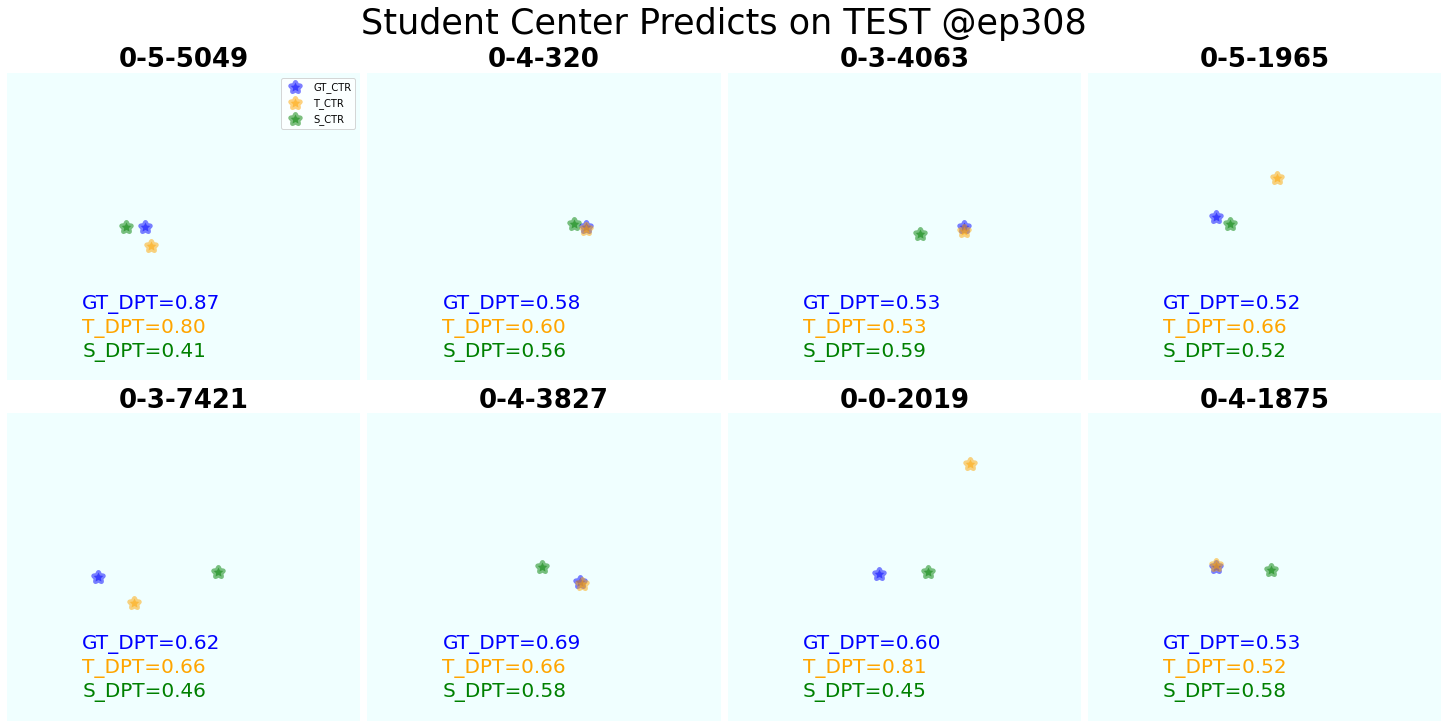

<Figure size 1440x720 with 0 Axes>

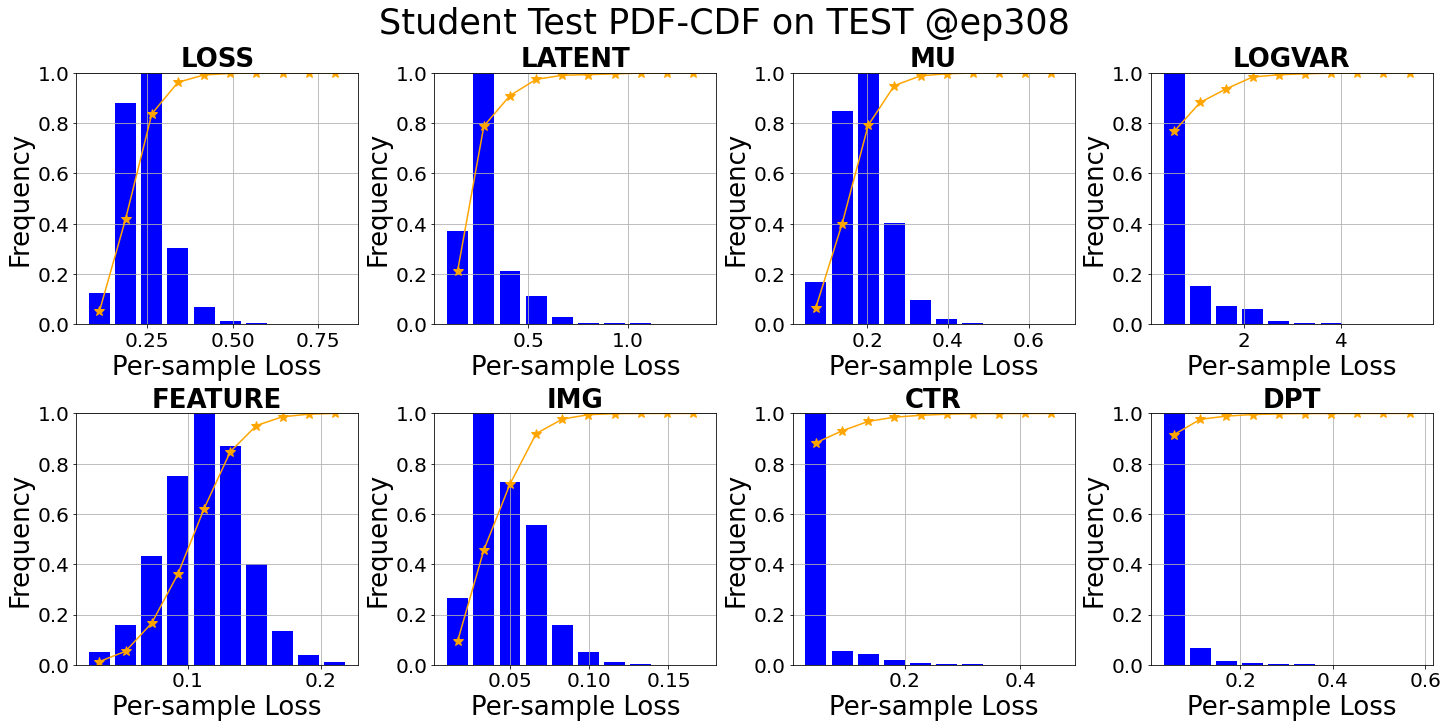

Saving preds: TR_PRED...
Saving preds: SR_PRED...
Saving preds: TC_PRED...
Saving preds: SC_PRED...
Saving preds: T_LATENT...
Saving preds: S_LATENT...
Saving preds: T_CTR...
Saving preds: T_DPT...
Saving preds: S_CTR...
Saving preds: S_DPT...
Saving preds: TAG...
All saved!

Student schedule Completed!
Generating loaders for s: level = env, current test = A308
 Train dataset length = 15306
 Test dataset length = 5007
 Exported train loader of len 191, batch size = 64
 Exported valid loader of len 47, batch size = 64
 Exported test loader of len 5007, batch size = 1

==========20240915_Env_A308 Student Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[02:28<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 300...

Total training time: 93763.49274635315 sec


<Figure size 1440x720 with 0 Axes>

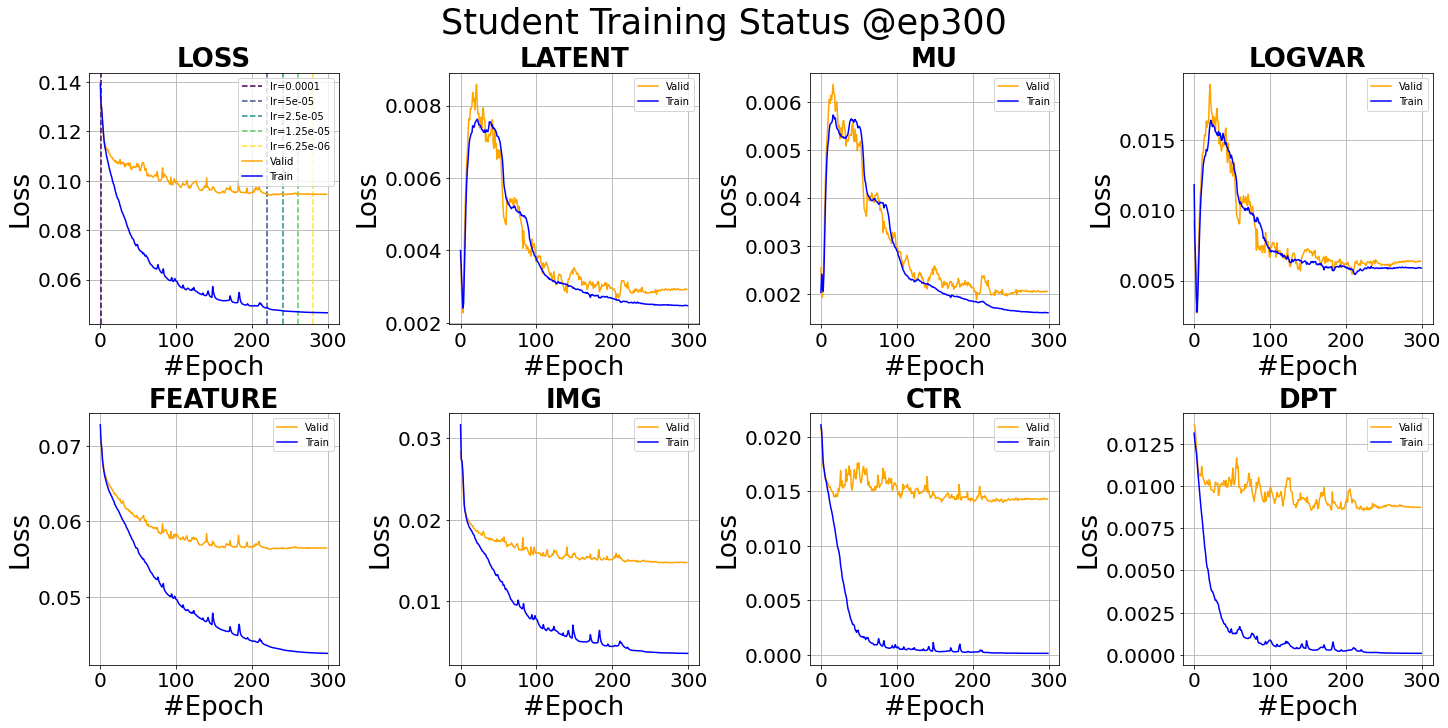

==========20240915_Env_A308 Student Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 0.06186805936730045, 'LATENT': 0.15914757879698832, 'MU': 0.10402592956521613, 'LOGVAR': 0.37963416079678347, 'FEATURE': 0.04234082476983788, 'IMG': 0.003478273985516711, 'CTR': 8.335240086879355e-05, 'DPT': 5.0850084893193084e-05}

Total training time: 383.91553568840027 sec


<Figure size 1440x720 with 0 Axes>

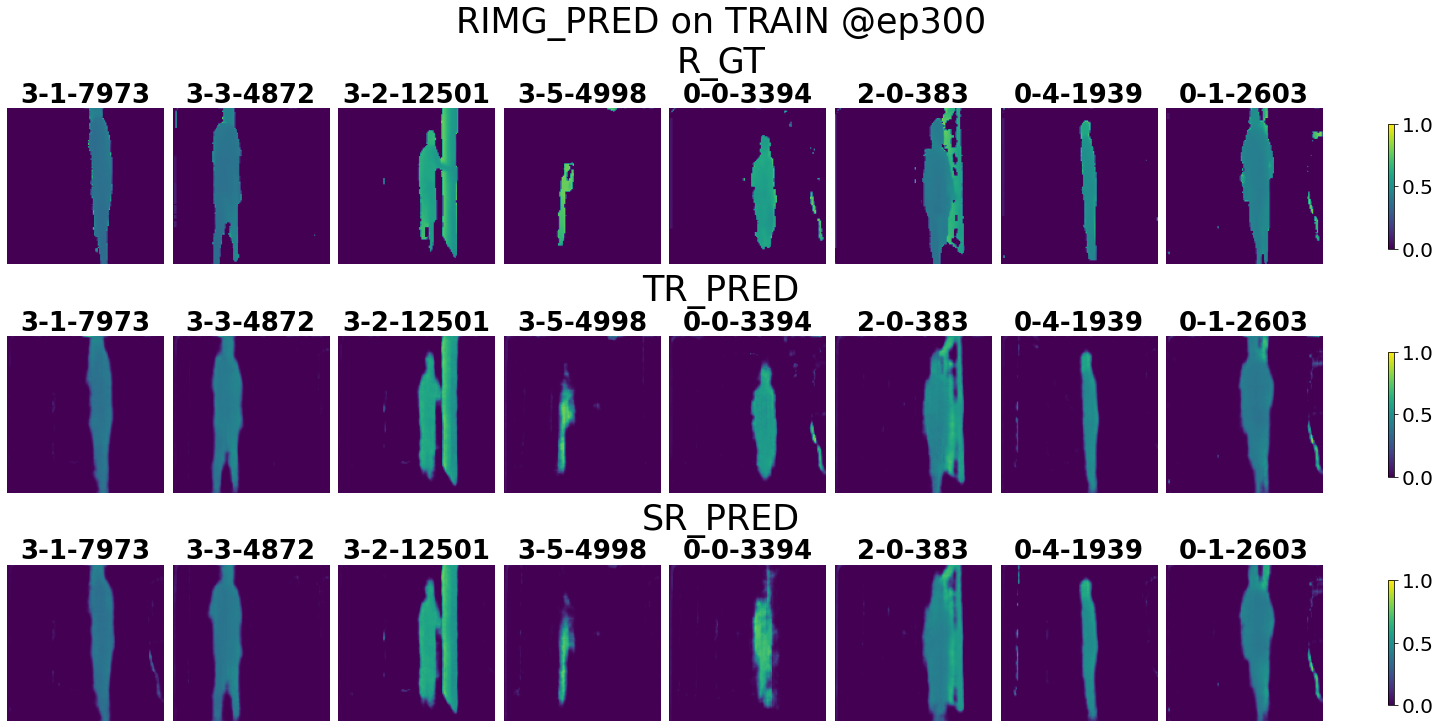

<Figure size 1440x720 with 0 Axes>

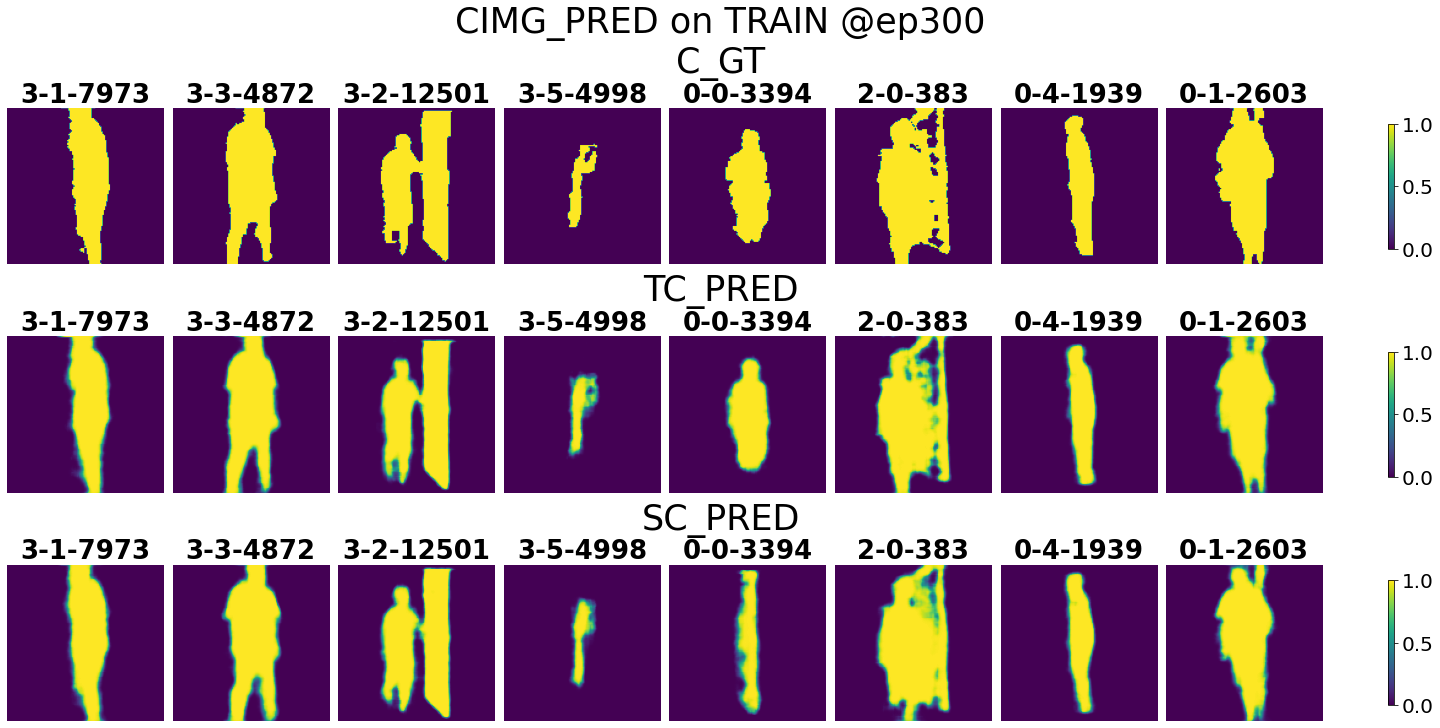

<Figure size 1440x720 with 0 Axes>

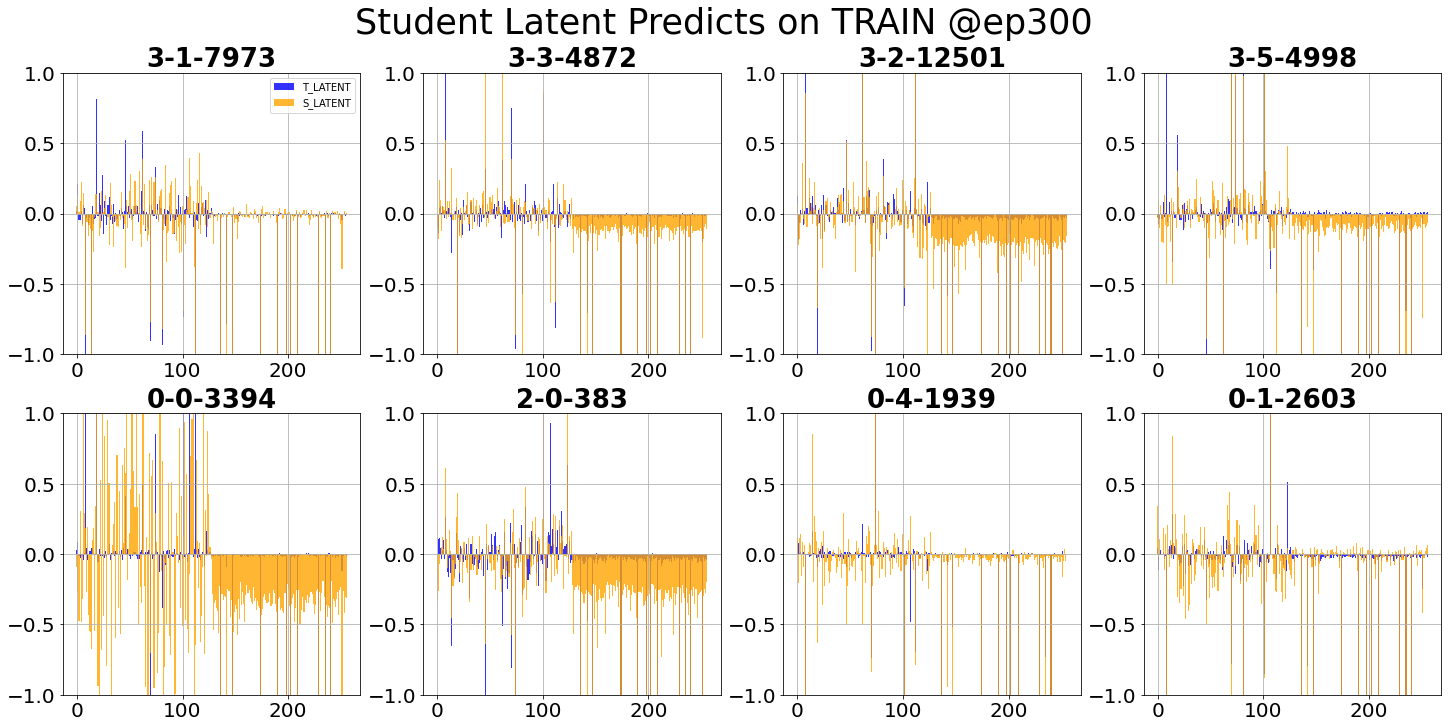

<Figure size 1440x720 with 0 Axes>

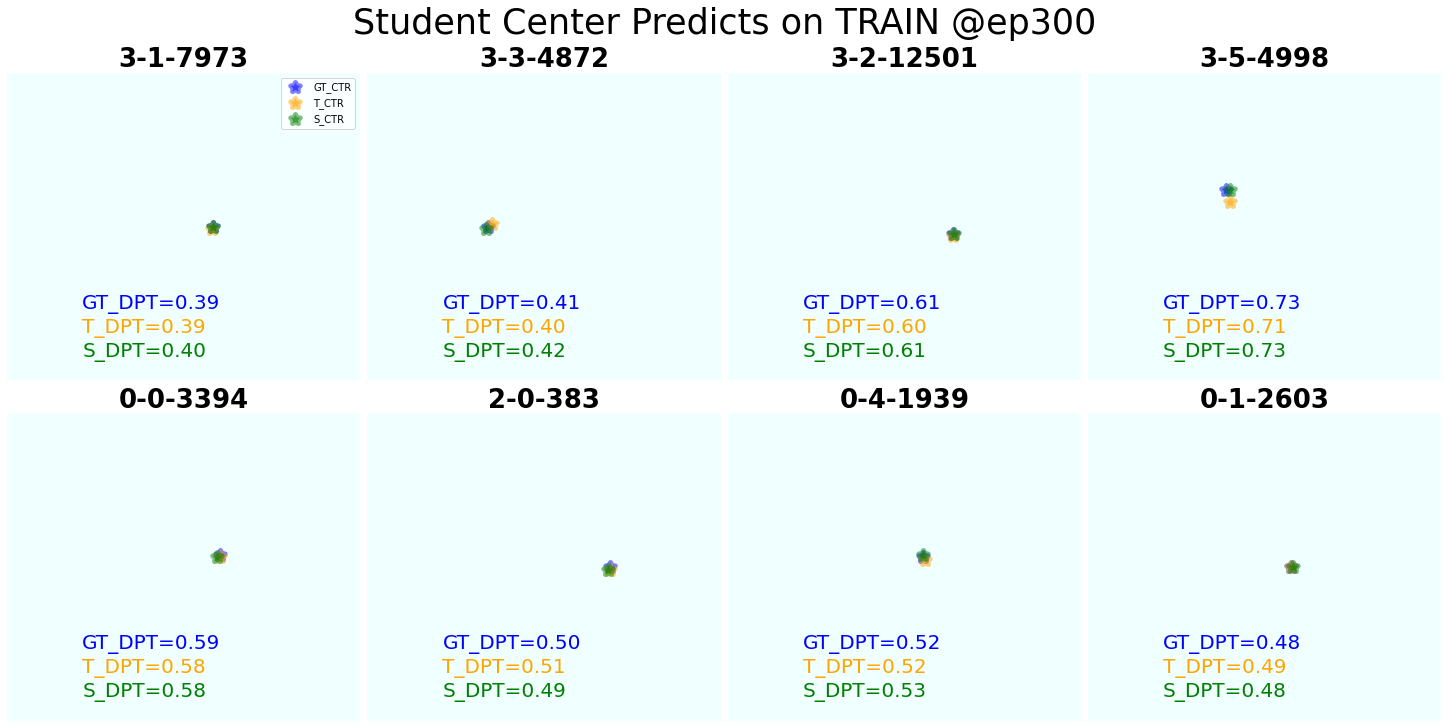

<Figure size 1440x720 with 0 Axes>

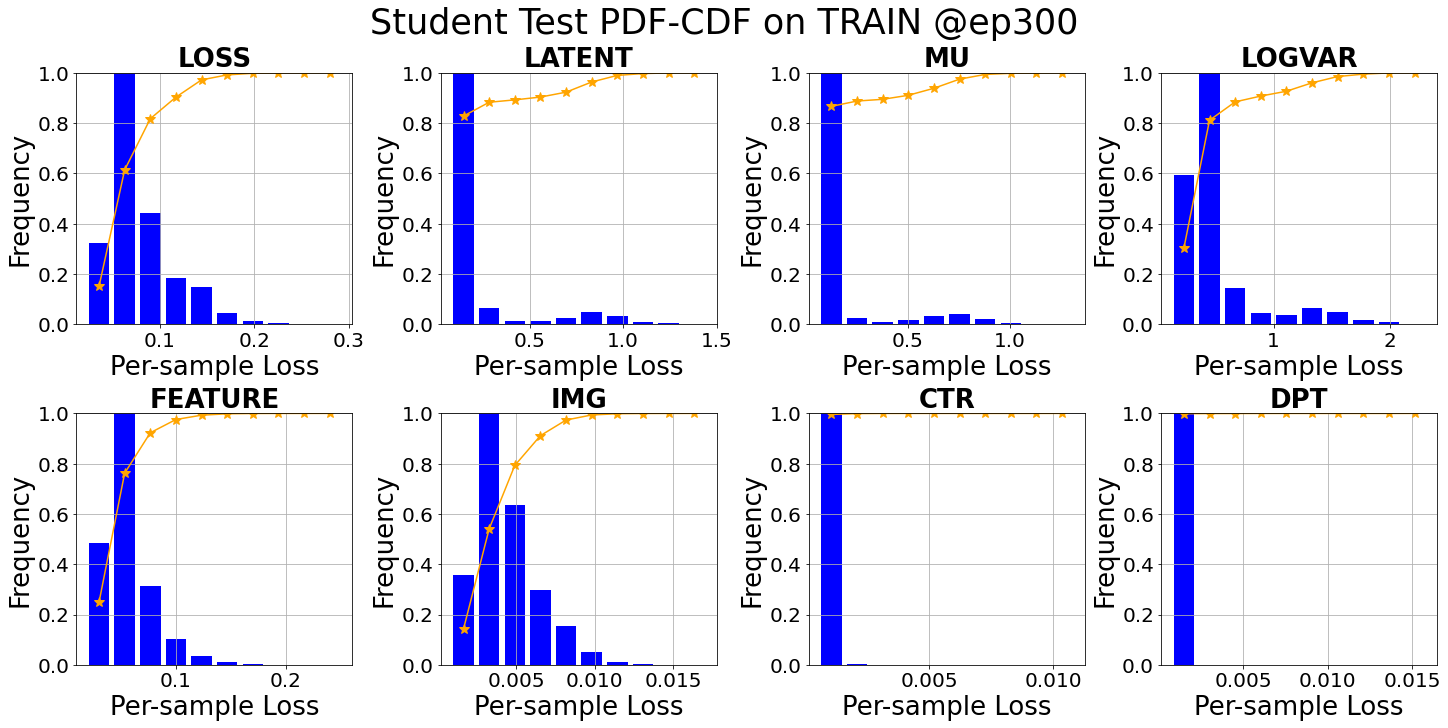

==========20240915_Env_A308 Student Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 0.20652882034222786, 'LATENT': 0.22961477432275365, 'MU': 0.1595408055760764, 'LOGVAR': 0.5099106294112081, 'FEATURE': 0.10050810092170293, 'IMG': 0.04765169087247808, 'CTR': 0.02320888553460768, 'DPT': 0.012198664839864048}

Total training time: 213.11738085746765 sec


<Figure size 1440x720 with 0 Axes>

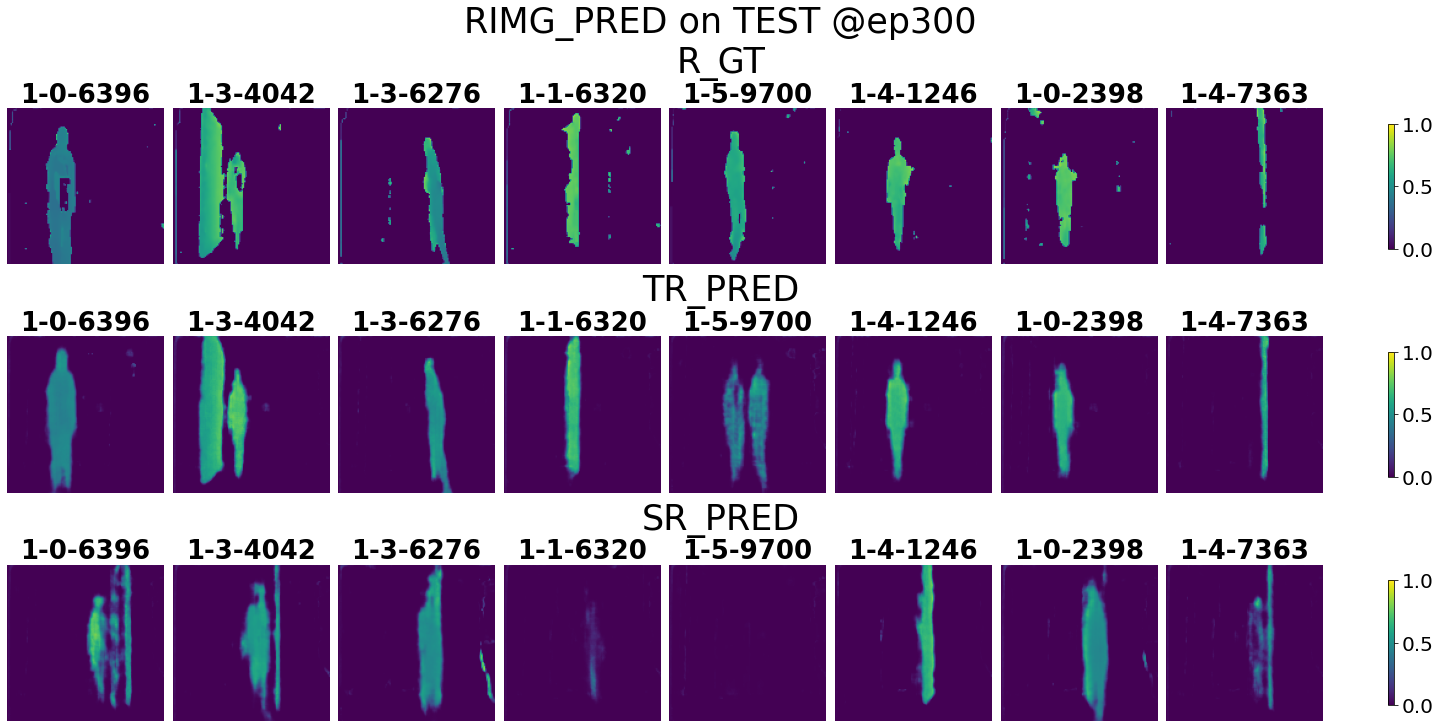

<Figure size 1440x720 with 0 Axes>

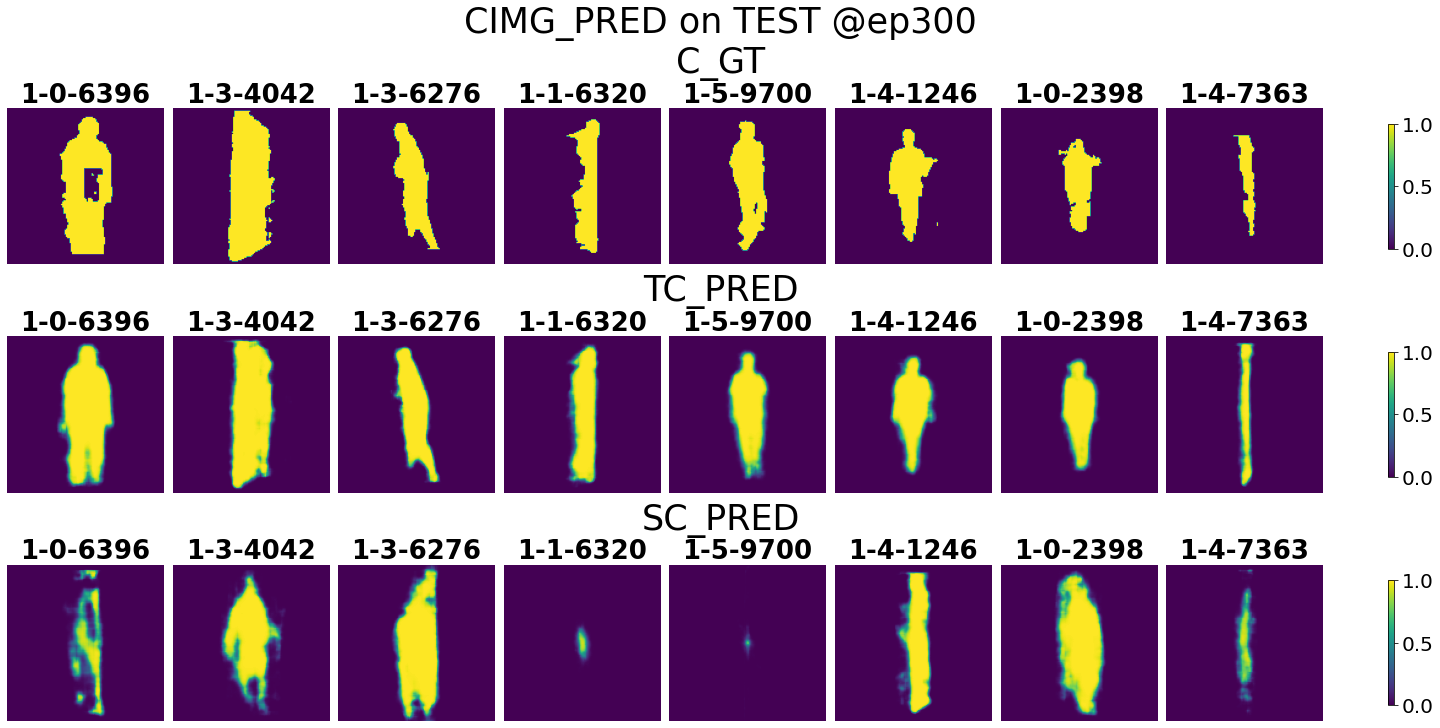

<Figure size 1440x720 with 0 Axes>

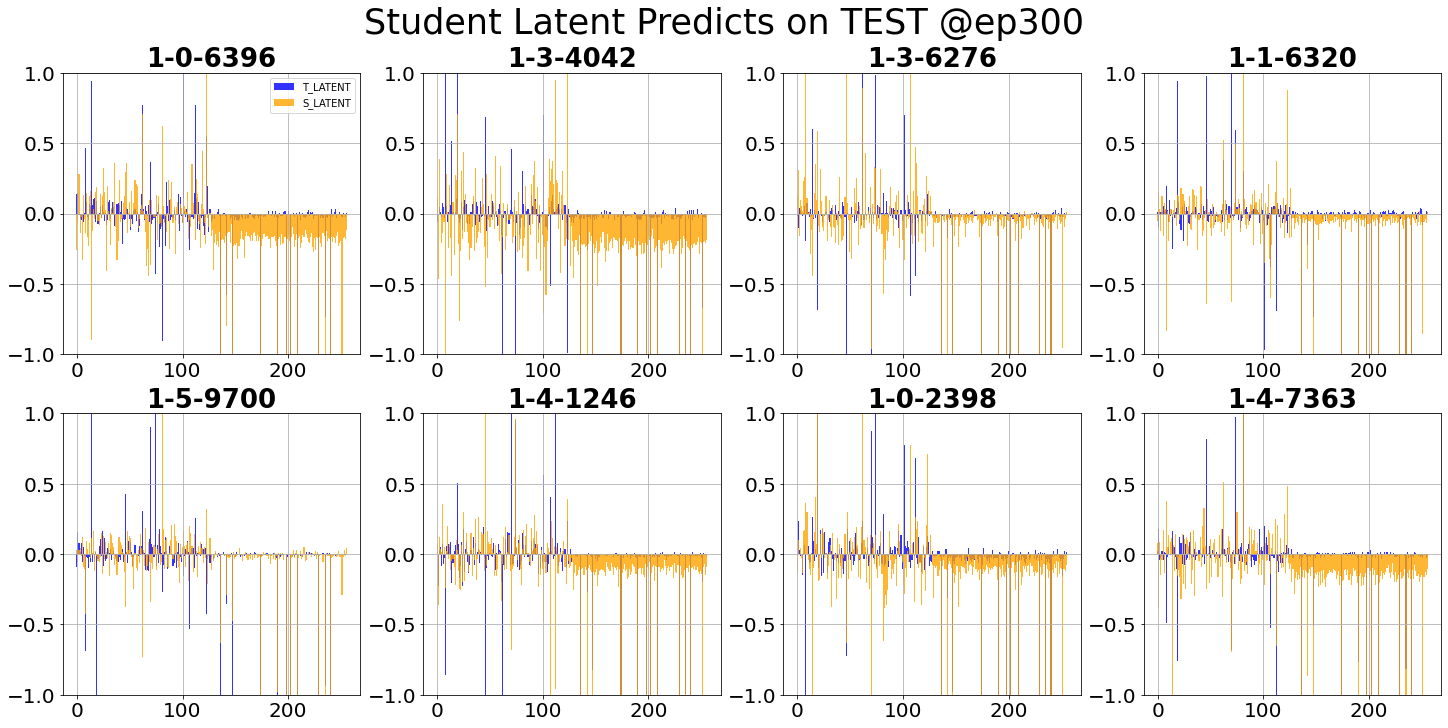

<Figure size 1440x720 with 0 Axes>

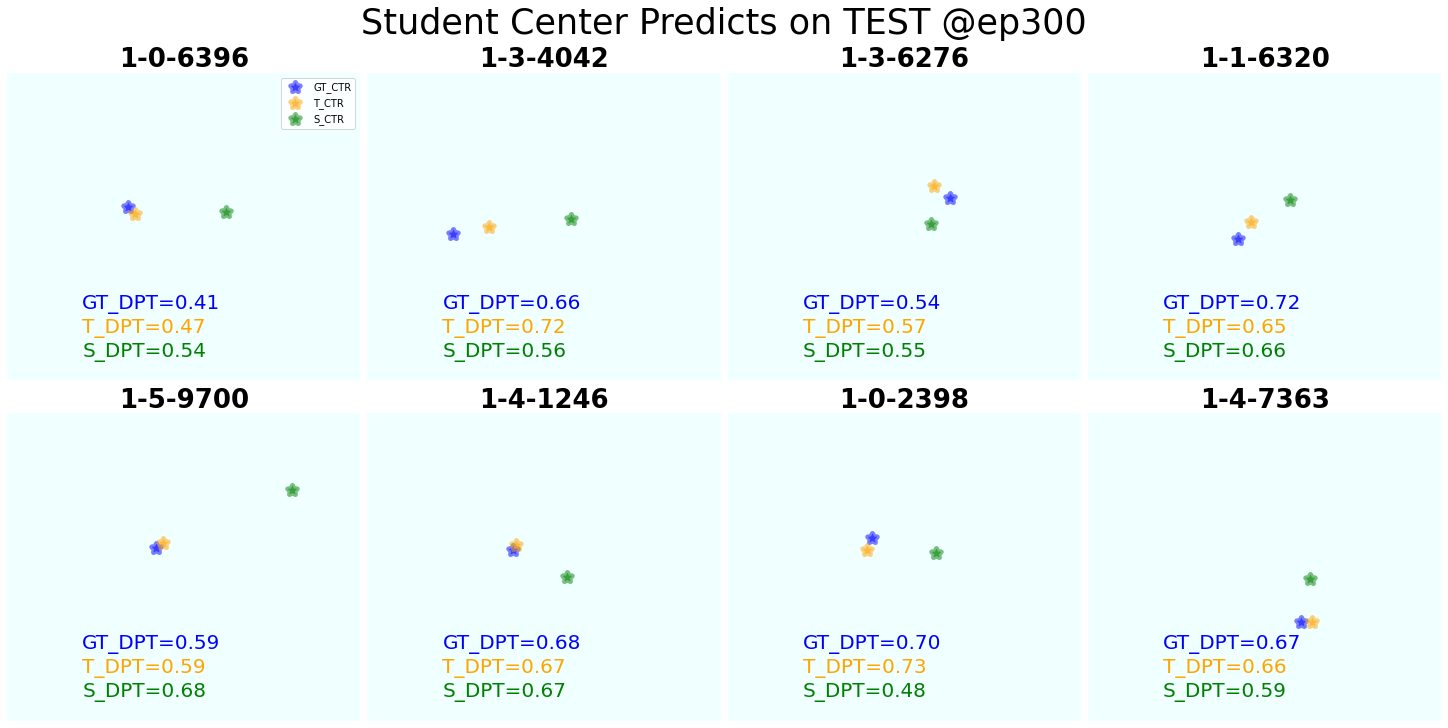

<Figure size 1440x720 with 0 Axes>

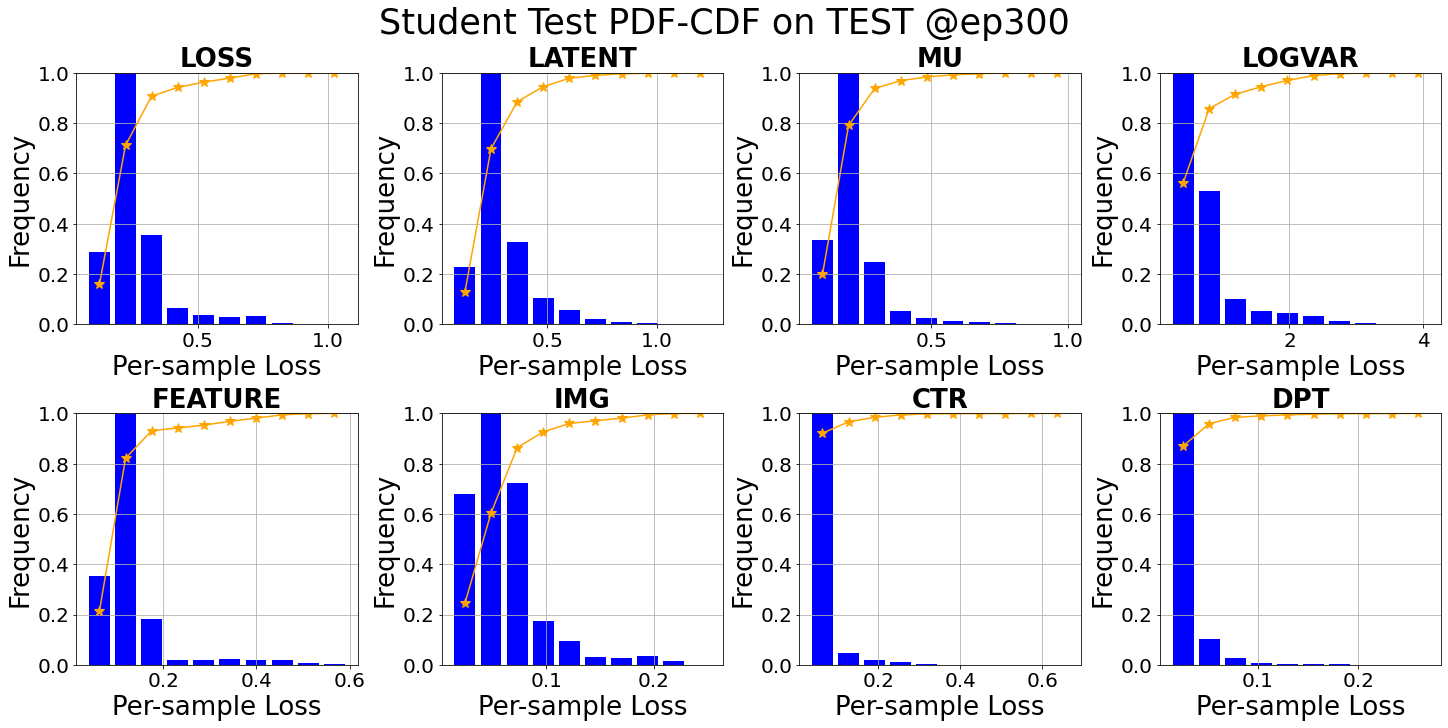

Saving preds: TR_PRED...
Saving preds: SR_PRED...
Saving preds: TC_PRED...
Saving preds: SC_PRED...
Saving preds: T_LATENT...
Saving preds: S_LATENT...
Saving preds: T_CTR...
Saving preds: T_DPT...
Saving preds: S_CTR...
Saving preds: S_DPT...
Saving preds: TAG...
All saved!

Student schedule Completed!


StopIteration: 

In [8]:
for i in range(4):
    data_organizer.gen_plan(subset_ratio=0.1)
    train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s')
    if current_test == 'B211':
        continue
    S_trainer = TP.StudentTrainer(name='Student',
                                  lstm_steps = 75,
                                  beta=0.5,
                                  loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                  lr=1e-4, epochs=10, cuda=gpu,
                                  preprocess = preprocess,
                                  notion=f'{name}_{current_test}',
                                  train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                                 )
    S_trainer.models['imgen'].load_state_dict(torch.load(f"../saved/20240915_Env_{current_test}/Teacher_imgen_best.pth"))
    S_trainer.models['cimgde'].load_state_dict(torch.load(f"../saved/20240915_Env_{current_test}/Teacher_cimgde_best.pth"))
    S_trainer.models['rimgde'].load_state_dict(torch.load(f"../saved/20240915_Env_{current_test}/Teacher_rimgde_best.pth"))
    S_trainer.models['ctrde'].load_state_dict(torch.load(f"../saved/20240915_Env_{current_test}/Teacher_ctrde_best.pth"))
    S_trained = S_trainer.schedule(lr_decay=True, train_module={'csien'}, eval_module={'imgen', 'cimgde', 'rimgde', 'ctrde'})

In [ ]:
print(data_organizer.data.keys())